# Are we spending more on transportation lately? Yes, but are we moving more?
## Mobility expenditure in Spain Exploration

This notebook tries to solve questions that could indicate changes in household mobility expenditures in the last years. The central hypothesis is that those changes (if any) are promoted by new mobility trends. Questions are analyzed by exploring the datasets of the Spanish household expenditure survey.

## Table of Contents
<ol>
<li><a href="#business">Business Understanding</a></li>
<li><a href="#dataunderstanding">Data Understanding</a></li>
<li><a href="#datapreparation"> Data Preparation</a>
    <ol>
        <li><a href="#datawrangling"> Data Wrangling</a></li>
            <ul>
                <li><a href="#gath">Gathering</a></li>
                <li><a href="#asse">Assessing</a></li>
                <li><a href="#clea">Cleaning</a></li>
            </ul> 
        <li><a href="#eda"> Data Analysis</a></li>
        </li>
    </ol> 
<li><a href="#result">Result Evaluation</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Refere">References</a></li>    
</ol>

<a id='business'></a>
## 1. Business Understanding

### Goals
For this case study, the primary goal is to check the economic impact of new mobility trends on Household transportation expenditures.  
From the vast array of mobility trends rising nowadays, the study considers micromobility, carsharing, and ridehailing. 
The impact these new trends have on transportation expenditures will be assessed by answering the following questions:
1. _Are we spending less on transportation lately?_  
    1.1 How have our transportation expenditures changed in the last five years?  

2. _Are we spending more on private cars (purchase and use)?_  
   2.1 Exploration of private car purchases.  
   2.2 Exploration of traditional vs. alternative fuels expenditure.   
   2.3 Exploration of driving licenses and private vehicle circulatory tax expenditure.  
   2.4 Has the share of income spent on owning and running motor vehicles changed over the years?  

3. _Is the use of Personal Mobility Vehicles (kickscooters, bikes, etc.) rising?_  
   3.1 Exploration of personal mobility vehicle purchases.  

4. _Are we spending more on public transportation?_    
    4.1 Exploration of public transportation expenditures; individual and combined tickets. 

5. _What variables correlate well with car-oriented mobility?_  

6. Are new mobility trends allowing us to spend less?  
    6.1  Exploration of shared mobility expenditures.  
 	6.2 Exploration of vehicle rent.  
 	6.3 Exploration of ridehailing and ridesharing expenditures.

<a id='dataunderstanding'></a>
## 2. Data Understanding

### Data collection

These questions require knowing how much household expenditures are destined for transportation. Also, regarding transportation spending, it would be interesting to distinguish the transportation means employed.  
  
Household budget surveys are widely spread datasets collected by many countries. They focus on household expenditures and provide a picture of the living conditions of a given country [1]. These surveys help answer many economic-related questions.
  
The survey employed in this analysis depicts Spain.
  
As mentioned in earlier sections, the mobility services considered for this study are micromobility, carsharing, and ridehailing. These are mainly present in urban settings, and not all urban populations of Spain have access to them. There are also suburban and rural mobility trends, which are scarcer and have less data available. Therefore, Spanish cities with micromobility and shared mobility players must be identified. From the research carried out checking the existence of shared and micromobility options [2-8], The Autonomous communities and provinces selected were Andalucía (Cordoba, Málaga, Granada, and Sevilla), Aragon (Zaragoza), Cataluña (Barcelona), Comunitat Valenciana (Valencia) and Comunidad de Madrid (Madrid).

<a id='datapreparation'></a>
## 3. Data Preparation

The Spanish household expenditure survey data was downloaded from the National Statistics Institute. Survey results are divided into three files. The first one includes the expenditures of all families, the second describes the household, and the third provides details related to the household members. 

Each data file comes with .docx documents explaining the meaning of the columns, temporal aggregation, and units.  


<a id='datawrangling'></a>
### Data wrangling

#### Required dependencies

In [414]:
# Imports

# File handling
import requests as rd
import zipfile

# Data preparation and analysis 
import numpy as np
import pandas as pd

# Statistics
from scipy import stats
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pymannkendall

# Data visualization 
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.io as pio
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format='retina'
import IPython.display
from IPython.display import display, clear_output


In [415]:
# shot plotly plots
pio.renderers.default = "plotly_mimetype+notebook"

<a id='gath'></a>
### Gathering

As explained above, each year is described in three datasets (expenditures, household information, and household member information). These datasets will be merged into one, and their data will be stored in three dictionaries with 5 DataFrames each, one per year. 

In [416]:
# Constants
PATH = 'data'
YEARS = [2018, 2019, 2020, 2021, 2022]

# Parameters
df_dict_keys = list(map(str, YEARS))

# Import data into dicts
# Create expenses DataFrames' dict
dfs_ = []
for i in range(len(df_dict_keys)):
    file_year_zip = f"{path2data}/EPFgastos_{years[i]}.csv.zip"
    file_zipfile = zipfile.ZipFile(file_year_zip)
    df = pd.read_csv(file_zipfile.open(file_year_zip[5:-4]), sep='\t', low_memory=False)
    dfs_.append(df)
dict_df_HBS_all_expenses = dict(zip(df_dict_keys, dfs_))

In [417]:
# Create households DataFrames' dict
dfs_households = []
for i in range(len(df_dict_keys)):
    df = pd.read_csv(f"{path2data}/EPFhogar_{years[i]}.csv", sep='\t', low_memory=False)
    dfs_households.append(df)
dict_df_HBS_all_households = dict(zip(df_dict_keys, dfs_households))

In [418]:
# Create household member information DataFrames' dict
dfs_membersHouseholds = []
for i in range(len(df_dict_keys)):
    df = pd.read_csv(f"{path2data}/EPFmhogar_{years[i]}.csv", sep='\t', low_memory=False)
    dfs_membersHouseholds.append(df)
dict_df_HBS_all_memberHouseholds = dict(zip(df_dict_keys, dfs_membersHouseholds))

> Handling the DataFrames into dictionaries offers flexibility to access specific year's values. The setback is that it requires loops. In addition to these dictionaries, a DataFrame will store the information for all five years. Ultimately, the facility to handle one or another will be discussed.

> The datasets are inspected to make sure the dictionaries were created correctly.

In [419]:
# Visual inspection 
dict_df_HBS_all_expenses['2019']

,ANOENC,NUMERO,CODIGO,GASTO,PORCENDES,PORCENIMP,CANTIDAD,GASTOMON,GASTNOM1,GASTNOM2,GASTNOM3,GASTNOM4,GASTNOM5,FACTOR
0,2019,1,01111,28314.98,0.0,0.0,37127.76,28314.98,NaN,NaN,NaN,NaN,NaN,1294.618356
1,2019,1,01113,372283.47,0.0,0.0,256519.10,372283.47,NaN,NaN,NaN,NaN,NaN,1294.618356
2,2019,1,01114,35484.02,0.0,0.0,27002.01,35484.02,NaN,NaN,NaN,NaN,NaN,1294.618356
3,2019,1,01118,82437.14,0.0,0.0,10125.75,82437.14,NaN,NaN,NaN,NaN,NaN,1294.618356
4,2019,1,01122,293370.09,0.0,0.0,91131.79,293370.09,NaN,NaN,NaN,NaN,NaN,1294.618356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889673,2019,20817,12111,3634.29,0.0,100.0,NaN,3634.29,NaN,NaN,NaN,NaN,NaN,534.816259
1889674,2019,20817,12521,128355.90,0.0,0.0,NaN,128355.90,NaN,NaN,NaN,NaN,NaN,534.816259
1889675,2019,20817,12541,248689.56,0.0,0.0,NaN,248689.56,NaN,NaN,NaN,NaN,NaN,534.816259
1889676,2019,20817,12704,411.43,0.0,100.0,NaN,411.43,NaN,NaN,NaN,NaN,NaN,534.816259


In [420]:
# Visual inspection 
dict_df_HBS_all_households['2020']

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,...,FUENPRIN,FUENPRINRED,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
0,2020,1,12,1,6,3,3,1,1,1593.985745,...,2,2,2726,6,2,56,0,0,0,56
1,2020,2,5,7,1,1,1,1,1,259.167031,...,1,1,4998,7,2,60,0,0,0,60
2,2020,3,5,7,1,1,1,1,1,529.688667,...,3,3,1245,3,2,56,0,0,0,56
3,2020,4,10,5,6,3,2,2,2,1034.909802,...,3,3,3106,7,2,54,0,0,0,54
4,2020,5,16,2,6,2,1,2,2,371.914654,...,4,3,1250,3,1,112,0,0,0,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,2020,19166,7,4,6,5,3,1,1,580.026322,...,3,3,2185,5,1,56,0,0,0,56
19166,2020,19167,9,5,6,5,3,2,2,2578.309998,...,2,2,2200,5,1,112,0,0,0,112
19167,2020,19168,9,5,6,5,3,2,2,1846.706676,...,1,1,2215,5,2,81,0,0,0,81
19168,2020,19169,10,5,6,3,2,2,2,1571.709414,...,3,3,1365,3,1,28,0,0,0,28


In [421]:
# Visual inspection 
dict_df_HBS_all_memberHouseholds['2019']

,ANOENC,NUMERO,NORDEN,CATEGMH,SUSPRIN,RELASP,EDAD,SEXO,PAISNACIM,NACIONA,...,SITURED,OCU,JORNADA,PERCEP,IMPEXACP,INTERINP,NINODEP,HIJODEP,ADULTO,FACTOR
0,2019,1,1,1,1,1,56,6,1,1,...,1,1,1,1,-9.0,03,6,6,1,1294.618356
1,2019,1,2,1,6,2,64,1,1,1,...,2,2,,1,-9.0,02,6,6,1,1294.618356
2,2019,1,3,1,6,3,27,1,1,1,...,2,2,,6,NaN,,6,6,1,1294.618356
3,2019,2,1,1,1,1,69,1,1,1,...,2,2,,1,-9.0,05,6,6,1,1569.018845
4,2019,3,1,1,1,1,66,6,1,1,...,2,2,,1,558.0,02,6,6,1,332.468410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54032,2019,20816,4,1,6,3,10,1,1,1,...,,,,6,NaN,,1,1,6,371.083222
54033,2019,20816,5,1,6,3,3,6,1,1,...,,,,6,NaN,,1,1,6,371.083222
54034,2019,20817,1,1,1,1,72,1,1,1,...,2,2,,1,-9.0,02,6,6,1,534.816259
54035,2019,20817,2,1,6,2,67,6,1,1,...,2,2,,6,NaN,,6,6,1,534.816259



<a id='asse'></a>
### Assessing

<p style='text-align: justify;'> This part of the analysis will focus on identifying those aspects of the datasets to improve. These improvements will make posterior analysis and modeling possible. </p>

**-` Expenses DataFrames`**

In [422]:
# Visual inspection 
dict_df_HBS_all_expenses['2022'].head()

,ANOENC,NUMERO,CODIGO,GASTO,PORCENDES,PORCENIMP,CANTIDAD,GASTOMON,GASTNOM1,GASTNOM2,GASTNOM3,GASTNOM4,GASTNOM5,FACTOR
0,2022,1,01111,4904.58,100.00,0.0,1563.96,4904.58,NaN,NaN,NaN,NaN,NaN,299.937215
1,2022,1,01112,2202.06,100.00,0.0,NaN,2202.06,NaN,NaN,NaN,NaN,NaN,299.937215
2,2022,1,01113,191447.43,32.34,0.0,56302.55,191447.43,NaN,NaN,NaN,NaN,NaN,299.937215
3,2022,1,01114,54403.90,100.00,0.0,9383.76,54403.90,NaN,NaN,NaN,NaN,NaN,299.937215
4,2022,1,01115,8617.42,100.00,0.0,NaN,8617.42,NaN,NaN,NaN,NaN,NaN,299.937215


In [423]:
# Display basic information
dict_df_HBS_all_expenses['2022'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437060 entries, 0 to 1437059
Data columns (total 14 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ANOENC     1437060 non-null  int64  
 1   NUMERO     1437060 non-null  int64  
 2   CODIGO     1437060 non-null  object 
 3   GASTO      1437060 non-null  float64
 4   PORCENDES  1437060 non-null  float64
 5   PORCENIMP  1437060 non-null  float64
 6   CANTIDAD   545314 non-null   float64
 7   GASTOMON   1437058 non-null  float64
 8   GASTNOM1   2537 non-null     float64
 9   GASTNOM2   934 non-null      float64
 10  GASTNOM3   1868 non-null     float64
 11  GASTNOM4   20665 non-null    float64
 12  GASTNOM5   0 non-null        float64
 13  FACTOR     1437060 non-null  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 153.5+ MB


In [424]:
# Verify data type
type(dict_df_HBS_all_expenses['2022']['CODIGO'][9])

str

> The columns with the most missing values seem to be the ones named 'GASTNOM#.'  
The description file indicated that these columns are reserved for expenditures paid using non-monetary compensations. These could be labor, work tickets, etc.

In [425]:
# Look at unique values
dict_df_HBS_all_expenses['2022'].nunique()

ANOENC             1
NUMERO         20585
CODIGO           360
GASTO        1241913
PORCENDES       9652
PORCENIMP       8478
CANTIDAD      365169
GASTOMON     1218944
GASTNOM1        2474
GASTNOM2         917
GASTNOM3        1772
GASTNOM4       20378
GASTNOM5           0
FACTOR         17861
dtype: int64

In [426]:
# Look at duplicated values
sum(dict_df_HBS_all_expenses['2022'].duplicated())

0

In [427]:
# Inspect shape 
for year in df_dict_keys:
    print(f"{year} expenses' table is composed by {dict_df_HBS_all_expenses[year].shape[0]:,} rows and {dict_df_HBS_all_expenses[year].shape[1]} columns.")

2018 expenses' table is composed by 1,924,175 rows and 14 columns.
2019 expenses' table is composed by 1,889,678 rows and 14 columns.
2020 expenses' table is composed by 1,568,629 rows and 14 columns.
2021 expenses' table is composed by 1,488,799 rows and 14 columns.
2022 expenses' table is composed by 1,437,060 rows and 14 columns.


> All tables share the same number of columns, but the rows (observations) vary.

In [428]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the spending habits of {len(dict_df_HBS_all_expenses[year]['NUMERO'].unique()):,} families.")

2018 describes the spending habits of 21,395 families.
2019 describes the spending habits of 20,817 families.
2020 describes the spending habits of 19,169 families.
2021 describes the spending habits of 19,394 families.
2022 describes the spending habits of 20,585 families.


> The year with most families is 2018. This fact has little impact when considering the overall Spanish population because each family includes an expansion factor that links the sample household with the number of homes they represent in the population.

In [429]:
# Look at statistics 
dict_df_HBS_all_expenses['2021'].describe()

,ANOENC,NUMERO,GASTO,PORCENDES,PORCENIMP,CANTIDAD,GASTOMON,GASTNOM1,GASTNOM2,GASTNOM3,GASTNOM4,GASTNOM5,FACTOR
count,1488799.0,1.488799e+06,1.488799e+06,1.488799e+06,1.488799e+06,5.901330e+05,1.488797e+06,2.447000e+03,1.530000e+03,1.895000e+03,1.974900e+04,0.0,1.488799e+06
mean,2021.0,9.679386e+03,3.705809e+05,3.762530e+01,1.440463e+01,2.589946e+05,2.855865e+05,6.147322e+05,1.852813e+05,9.562027e+05,6.225154e+06,NaN,9.834518e+02
std,0.0,5.587630e+03,1.638910e+06,4.756322e+01,3.450117e+01,1.270695e+06,1.288340e+06,3.027980e+06,7.675572e+05,3.138617e+06,6.322289e+06,NaN,7.368025e+02
min,2021.0,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,1.001000e+01,0.000000e+00,0.000000e+00,7.800000e-01,9.203000e+01,8.453072e+04,NaN,7.411386e+01
25%,2021.0,4.839000e+03,5.591385e+03,0.000000e+00,0.000000e+00,8.155760e+03,4.469960e+03,7.190204e+04,1.165194e+04,8.113860e+03,2.542857e+06,NaN,4.572252e+02
50%,2021.0,9.692000e+03,5.160908e+04,0.000000e+00,0.000000e+00,2.711620e+04,4.705294e+04,1.723470e+05,4.862174e+04,1.010220e+05,4.230137e+06,NaN,7.823255e+02
75%,2021.0,1.448200e+04,2.151886e+05,1.000000e+02,0.000000e+00,9.268774e+04,1.973388e+05,3.956287e+05,1.432249e+05,7.502103e+05,7.803856e+06,NaN,1.331782e+03
max,2021.0,1.939400e+04,2.797928e+08,1.000000e+02,1.000000e+02,1.118148e+08,2.797928e+08,1.020367e+08,1.637394e+07,5.707537e+07,2.444656e+08,NaN,9.423128e+03


In [430]:
# Look at statistics- categorical variables
dict_df_HBS_all_expenses['2020'].describe(include = 'object')

,CODIGO
count,1568629
unique,361
top,04511
freq,18850


**-` Households DataFrames`**

In [431]:
# Visual inspection 
dict_df_HBS_all_households['2018'].head()

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,...,FUENPRIN,FUENPRINRED,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
0,2018,1,2,2,1,1,1,2,2,422.866646,...,2,2,2324,5,2,54,0,0,0,54
1,2018,2,9,5,6,4,2,1,1,2051.951724,...,2,2,2682,6,2,64,0,0,0,64
2,2018,3,13,3,1,1,1,1,1,1349.187753,...,3,3,3240,7,2,52,0,0,0,52
3,2018,4,10,5,1,1,1,1,1,1200.012995,...,3,3,746,2,1,28,0,0,0,28
4,2018,5,1,6,6,3,2,1,1,887.660816,...,3,3,3150,7,2,54,0,0,2,56


In [432]:
# Display basic information
dict_df_HBS_all_households['2019'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Columns: 188 entries, ANOENC to COMITOT
dtypes: float64(30), int64(97), object(61)
memory usage: 29.9+ MB


> Info is not showing information due to the number of columns in the DataFrame. The verbose parameter is set to True to check some columns.

In [433]:
# Display basic information
dict_df_HBS_all_households['2019'].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 188 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    ANOENC         20817 non-null  int64  
 1    NUMERO         20817 non-null  int64  
 2    CCAA           20817 non-null  int64  
 3    NUTS1          20817 non-null  int64  
 4    CAPROV         20817 non-null  int64  
 5    TAMAMU         20817 non-null  int64  
 6    DENSIDAD       20817 non-null  int64  
 7    CLAVE          20817 non-null  int64  
 8    CLATEO         20817 non-null  int64  
 9    FACTOR         20817 non-null  float64
 10   NMIEMB         20817 non-null  int64  
 11   TAMANO         20817 non-null  int64  
 12   NMIEMSD        20817 non-null  int64  
 13   NMIEMHU        20817 non-null  int64  
 14   NMIEMIN        20817 non-null  int64  
 15   NMIEM1         20817 non-null  int64  
 16   NMIEM2         20817 non-null  int64  
 17   NMIEM3         20817 non-null

In [434]:
# Look at null values
dict_df_HBS_all_households['2022'].isnull().sum().sum()

444172

In [435]:
# Look at unique values
dict_df_HBS_all_households['2020'].nunique()

ANOENC         1
NUMERO     19170
CCAA          19
NUTS1          7
CAPROV         2
           ...  
COMIMH       183
COMISD        23
COMIHU        33
COMIINV       85
COMITOT      198
Length: 188, dtype: int64

In [436]:
# Look at duplicated values
sum(dict_df_HBS_all_households['2022'].duplicated())

0

In [437]:
# Inspect shape of all datasets
for year in df_dict_keys:
    print(f"{year} household's table is composed by {dict_df_HBS_all_households[year].shape[0]:,} rows and {dict_df_HBS_all_households[year].shape[1]} columns.")

2018 household's table is composed by 21,395 rows and 188 columns.
2019 household's table is composed by 20,817 rows and 188 columns.
2020 household's table is composed by 19,170 rows and 188 columns.
2021 household's table is composed by 19,394 rows and 188 columns.
2022 household's table is composed by 20,585 rows and 188 columns.


In [438]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the housing conditions of {len(dict_df_HBS_all_households[year]['NUMERO'].unique()):,} families (sample).")

2018 describes the housing conditions of 21,395 families (sample).
2019 describes the housing conditions of 20,817 families (sample).
2020 describes the housing conditions of 19,170 families (sample).
2021 describes the housing conditions of 19,394 families (sample).
2022 describes the housing conditions of 20,585 families (sample).


> As expected, this information matches the one displayed in the expenses table.

> Additionally, we could use the population factor to see how many families these samples represent.

In [439]:
# Inspect no. of families
for year in df_dict_keys:
    print(f"{year} describes the housing conditions of {sum(dict_df_HBS_all_households[year]['FACTOR'].unique()):,} families (population).")    

2018 describes the housing conditions of 16,250,884.721614044 families (population).
2019 describes the housing conditions of 16,382,540.574927999 families (population).
2020 describes the housing conditions of 16,639,759.770363979 families (population).
2021 describes the housing conditions of 16,417,174.825565014 families (population).
2022 describes the housing conditions of 16,713,176.268896982 families (population).


In [440]:
# Look at statistics
dict_df_HBS_all_households['2018'].describe()

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,...,RENTAS,OTROIN,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
count,21395.0,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,...,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000,21395.000000
mean,2018.0,10698.000000,9.094835,3.749942,4.296565,2.715074,1.813788,1.422622,1.522038,870.655626,...,5.559477,5.788035,2155.686282,4.458565,1.589297,60.500444,0.118766,0.136060,4.220799,64.978593
std,0.0,6176.348841,5.015944,1.842902,2.369757,1.610837,0.847493,0.493988,0.499526,615.040256,...,1.585391,1.232785,1432.750748,1.937125,1.178040,31.919562,1.650964,2.216172,10.935581,33.321940
min,2018.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.061002,...,-9.000000,-9.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2018.0,5349.500000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,420.004649,...,6.000000,6.000000,1209.000000,3.000000,1.000000,34.000000,0.000000,0.000000,0.000000,41.000000
50%,2018.0,10698.000000,9.000000,4.000000,6.000000,3.000000,2.000000,1.000000,2.000000,689.051204,...,6.000000,6.000000,1800.000000,4.000000,2.000000,56.000000,0.000000,0.000000,0.000000,59.000000
75%,2018.0,16046.500000,13.000000,5.000000,6.000000,4.000000,3.000000,2.000000,2.000000,1182.371731,...,6.000000,6.000000,2736.000000,6.000000,2.000000,82.000000,0.000000,0.000000,3.000000,84.000000
max,2018.0,21395.000000,19.000000,7.000000,6.000000,5.000000,3.000000,2.000000,2.000000,6121.820126,...,6.000000,6.000000,17500.000000,10.000000,7.000000,308.000000,56.000000,125.000000,196.000000,308.000000


In [441]:
# Look at statistics for categorical variables
dict_df_HBS_all_households['2022'].describe(include = 'object')

,PAISSP,UNIONSP,JORNADASP,INTERINPSP,OCUPA,OCUPARED,ACTESTB,ACTESTBRED,SITPROF,SECTOR,...,FUENACV8,CALEFV8,FUENCAV8,REGTENV9,AGUACV9,FUENACV9,CALEFV9,FUENCAV9,FUENPRIN,FUENPRINRED
count,20585,20585,20585,20585,20585,20585,20585,20585,20585,20585,...,20585,20585,20585,20585,20585,20585,20585,20585,20585,20585
unique,4,4,3,9,12,7,22,5,6,4,...,1,1,1,1,1,1,1,1,9,5
top,,1,1,03,2,2,C,3,1,6,...,,,,,,,,,2,2
freq,18938,11391,11941,6309,3538,5963,3435,13277,16761,12325,...,20585,20585,20585,20585,20585,20585,20585,20585,10378,10378


**`Household members' DataFrame`:**

In [442]:
# Visual inspection 
dict_df_HBS_all_memberHouseholds['2018'].head()

,ANOENC,NUMERO,NORDEN,CATEGMH,SUSPRIN,RELASP,EDAD,SEXO,PAISNACIM,NACIONA,...,SITURED,OCU,JORNADA,PERCEP,IMPEXACP,INTERINP,NINODEP,HIJODEP,ADULTO,FACTOR
0,2018,1,1,1,1,1,53,1,1,1,...,1,1,1,1,-9.0,03,6,6,1,422.866646
1,2018,1,2,1,6,2,53,6,1,1,...,1,1,1,1,-9.0,03,6,6,1,422.866646
2,2018,2,1,1,1,1,43,1,1,1,...,1,1,1,1,-9.0,04,6,6,1,2051.951724
3,2018,2,2,1,6,2,42,6,1,1,...,1,1,1,1,-9.0,03,6,6,1,2051.951724
4,2018,2,3,1,6,3,9,6,1,1,...,,,,6,NaN,,1,1,6,2051.951724


In [443]:
# Display basic information
dict_df_HBS_all_memberHouseholds['2019'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54037 entries, 0 to 54036
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANOENC       54037 non-null  int64  
 1   NUMERO       54037 non-null  int64  
 2   NORDEN       54037 non-null  int64  
 3   CATEGMH      54037 non-null  int64  
 4   SUSPRIN      54037 non-null  int64  
 5   RELASP       54037 non-null  int64  
 6   EDAD         54037 non-null  int64  
 7   SEXO         54037 non-null  int64  
 8   PAISNACIM    54037 non-null  int64  
 9   NACIONA      54037 non-null  int64  
 10  PAISNACION   54037 non-null  object 
 11  SITURES      54037 non-null  int64  
 12  ECIVILLEGAL  54037 non-null  int64  
 13  NORDENCO     54037 non-null  int64  
 14  UNION        54037 non-null  object 
 15  CONVIVENCIA  54037 non-null  int64  
 16  NORDENPA     54037 non-null  int64  
 17  PAISPADRE    54037 non-null  int64  
 18  NORDENMA     54037 non-null  int64  
 19  PAIS

In [444]:
# Verify the data types of 'PAISNACION'
type(dict_df_HBS_all_memberHouseholds['2021']['PAISNACION'][0])

str

In [445]:
# Look at unique values
dict_df_HBS_all_memberHouseholds['2018'].nunique()

ANOENC             1
NUMERO         21395
NORDEN            11
CATEGMH            4
SUSPRIN            2
RELASP             6
EDAD              86
SEXO               2
PAISNACIM          4
NACIONA            3
PAISNACION         4
SITURES            2
ECIVILLEGAL        5
NORDENCO          11
UNION              4
CONVIVENCIA        3
NORDENPA          10
PAISPADRE          5
NORDENMA          11
PAISMADRE          5
ESTUDIOS          10
ESTUDRED           6
SITUACT           10
SITURED            4
OCU                4
JORNADA            3
PERCEP             3
IMPEXACP        1797
INTERINP           9
NINODEP            3
HIJODEP            3
ADULTO             3
FACTOR         18363
dtype: int64

In [446]:
# Look at duplicated values
sum(dict_df_HBS_all_memberHouseholds['2018'].duplicated())

0

In [447]:
# Inspect shape 
for year in df_dict_keys:
    print(f"{year} household's info table is composed by {dict_df_HBS_all_memberHouseholds[year].shape[0]:,} rows and {dict_df_HBS_all_memberHouseholds[year].shape[1]} columns.")

2018 household's info table is composed by 55,725 rows and 33 columns.
2019 household's info table is composed by 54,037 rows and 33 columns.
2020 household's info table is composed by 49,423 rows and 33 columns.
2021 household's info table is composed by 49,404 rows and 33 columns.
2022 household's info table is composed by 52,148 rows and 33 columns.


In [448]:
# Look at statistics
dict_df_HBS_all_memberHouseholds['2022'].describe()

,ANOENC,NUMERO,NORDEN,CATEGMH,SUSPRIN,RELASP,EDAD,SEXO,PAISNACIM,NACIONA,...,NORDENPA,PAISPADRE,NORDENMA,PAISMADRE,PERCEP,IMPEXACP,NINODEP,HIJODEP,ADULTO,FACTOR
count,52148.0,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,...,52148.000000,52148.000000,52148.000000,52148.000000,52148.000000,35453.000000,52148.000000,52148.000000,52148.000000,52148.000000
mean,2022.0,10279.885633,2.073291,1.000978,4.026291,2.079389,43.753509,3.565487,1.230440,1.121117,...,73.816292,1.285553,68.204936,1.295735,2.315583,488.447296,4.852209,4.867262,2.146832,901.627944
std,0.0,5939.262859,1.146288,0.041763,2.443999,1.140530,22.481900,2.499166,0.766754,0.408808,...,42.742317,0.855987,45.218442,0.865681,3.020692,828.710403,2.104131,2.094381,2.103515,671.861765
min,2022.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,-9.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,48.270897
25%,2022.0,5132.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,-9.000000,6.000000,6.000000,1.000000,424.920887
50%,2022.0,10273.500000,2.000000,1.000000,6.000000,2.000000,47.000000,6.000000,1.000000,1.000000,...,99.000000,1.000000,99.000000,1.000000,1.000000,-9.000000,6.000000,6.000000,1.000000,709.770429
75%,2022.0,15420.250000,3.000000,1.000000,6.000000,3.000000,61.000000,6.000000,1.000000,1.000000,...,99.000000,1.000000,99.000000,1.000000,6.000000,926.000000,6.000000,6.000000,1.000000,1190.157681
max,2022.0,20585.000000,13.000000,4.000000,6.000000,6.000000,85.000000,6.000000,4.000000,3.000000,...,99.000000,4.000000,99.000000,4.000000,6.000000,17000.000000,6.000000,6.000000,6.000000,9983.726258


In [449]:
# Look at statistics for categorical variables
dict_df_HBS_all_memberHouseholds['2022'].describe(include = 'object')

,PAISNACION,UNION,ESTUDIOS,ESTUDRED,SITUACT,SITURED,OCU,JORNADA,INTERINP
count,52148,52148,52148,52148,52148,52148,52148,52148,52148
unique,4,4,10,6,10,4,4,3,9
top,,,3,4,1,1,1,,
freq,47414,25098,12566,15386,21317,26348,22425,29723,16695


#### Observations:
The main observations regarding data quality and tidiness are summarized below. Quality issues are divided by table, and tidiness issues are presented together for all tables.

##### Quality
In general, the quality of all datasets is good, as the Statistics Institute already cleaned them. Additional information on the information saved in the columns was obtained by carefully reading their instruction documents.

The required modifications are needed for this specific analysis.

###### `dict_df_HBS_all_expenses` DataFrames
1. Create a column with all expenses per family.
2. Some columns are not required for the analysis. Select relevant columns.
3. Some spending codes from the original 360 are not required for the analysis. Select pertinent consumption expenditures.  
4. Expenses are weighted spatially and temporarily. Create a monthly expenditure variable (because the salary is stored in monthly non-weighted amounts).


###### `dict_df_HBS_all_households` DataFrames
1. Some columns are not required for the analysis. Select relevant columns.
2. Handle null vaues.
3. 'CAPROV' is a boolean variable stored as quantitative. Change data type.
4. Remove cities not included in the analysis.

###### `dict_df_HBS_all_memberHouseholds` DataFrames
- Verify if the table is required for the analysis.

All column names could be translated into English to make more sense to non-Spanish-speaking audiences.

##### Tidiness
- The household number should be the observational unit in  `dict_df_HBS_all_expenses` DataFrames. First, the unrequired codes should be dropped, and then the important ones should be turned into columns. This process is required to join this table with the rest.
- All tables should be merged into one.

<a id='clea'></a>
### Cleaning

<p style='text-align: justify;'> The cleaning efforts carried out so as to fix the issues discovered in the previous section are described herein. </p>


###### `dict_df_EPF_all_expenses` DataFrames

1. Create column with total expenditures per family

_Define_

The column with the monetary expenses is named 'GASTOMON'. According to the documentation, the value displayed is elevated temporarily (year) and spatially (using the 'FACTOR' column). This column will be used to obtain the percentage of expenditures dedicated to transportation.

_Code_

In [450]:
# Create two columns with total expenses:
# One annual (get total per year) and another monthly (to be compared to salary)
total_expenses_yearly_list = []
total_expenses_monthly_list = []
for _year in df_dict_keys:
    total_expenses = dict_df_HBS_all_expenses[_year].groupby(
        'NUMERO')['GASTOMON'].sum()
    total_expenses_monthly = dict_df_HBS_all_expenses[_year].groupby(
        'NUMERO')['GASTOMON'].sum().div(12)
    total_expenses_yearly_list.append(total_expenses)
    total_expenses_monthly_list.append(total_expenses_monthly)
total_expenses_year_dict = dict(zip(df_dict_keys, total_expenses_yearly_list))
total_expenses_month_dict = dict(zip(df_dict_keys, total_expenses_monthly_list))

_Test_

In [451]:
# Visual inspection
total_expenses_year_dict['2018'].head()

NUMERO
1    1.398072e+07
2    1.062080e+08
3    3.425109e+07
4    3.556341e+06
5    1.777892e+07
Name: GASTOMON, dtype: float64

In [452]:
# Visual inspection
total_expenses_month_dict['2018'].head()

NUMERO
1    1.165060e+06
2    8.850669e+06
3    2.854258e+06
4    2.963617e+05
5    1.481577e+06
Name: GASTOMON, dtype: float64

2. Select relevant columns

_Define_

From this DataFrame, only the following columns are pertinent:  
`['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR']`  
Removing the other columns will remove the majority of missing values.

_Code_

In [453]:
# Drop unrequired columns
columns_expenses = ['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR']
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year].drop(
        dict_df_HBS_all_expenses[year].columns.difference(
            columns_expenses), axis = 1, inplace = True) 

_Test_

In [454]:
# Look at DataFrame's shape
for year in df_dict_keys:
    print(dict_df_HBS_all_expenses[year].columns)

Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR'], dtype='object')


3. Select pertinent consumption expenditures

_Define_

According to the documentation, the categories related to transportation expenditures start with 07. First, it is necessary to know how many codes begin with 07 in all DataFrames, then select the most important ones because these code rows will be later converted to columns. It would be preferable not to have too many columns.

_Code_

In [455]:
# Get number of transportation-related codes
for year in df_dict_keys:
    s_ = pd.Series(dict_df_HBS_all_expenses[year].CODIGO.unique())
    count = len(s_[s_.str.startswith('07')].tolist())
    print(f'{year}: {count} expenses starting with 07')

2018: 32 expenses starting with 07
2019: 32 expenses starting with 07
2020: 32 expenses starting with 07
2021: 31 expenses starting with 07
2022: 32 expenses starting with 07


Thirty-two codes are too many to be turned into columns. The most relevant to the analysis were selected in order to reduce this number. Some codes are designated to the use of more orthodox transportation means, such as private cars and public transportation. Others imply new mobility trends and active and greener mobility options. Selected codes were the ones that represented suburban and urban mobility (airplane tickets, ferries, long-distance trains, and long-distance buses were removed). None of the codes were useful for deducing expenditures in new mobility services for rural areas (on-demand buses, carpooling, etc).
Out of 32 transportation codes, the ones selected were:
- 071 - Purchase of personal vehicles:
    - 07111 - new cars *
    - 07112 - used cars *
    - 07120 - motorbikes, electric bikes, and personal mobility vehicles **
    - 07130 - bicycles **
- 072 - Use of personal vehicles:
    - 07221 - diesel fuel *
    - 07222 - gasoline *
    - 07223 - alternative fuels or electricity **
    - 07241 - carsharing, car leasing/renting, bike renting, PMV renting **
    - 07244 - driving license acquisition *
    - 07245 - mandatory circulation tax *
- 073 - Public transportation:
    - 07311 - train *
    - 07313 - subway/metro *
    - 07321 - bus *
    - 07322 - combined tickets **
    - 07324 - ridehailing, taxis, ridesharing **

071 codes also include insurance and car registration fees.

The ones with * refer to more orthodox mobility, and the ones with ** are those
newer mobility alternatives.

In [456]:
# Create list with codes
codes_mobility = ['07111','07112','07120','07130', '07211','07221',
'07222','07223','07241','07244','07245','07311','07313','07321','07322','07324', '07350']

In [457]:
# Select rows with codes of interest
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year] = dict_df_HBS_all_expenses[year].loc[
        dict_df_HBS_all_expenses[year]['CODIGO'].isin(codes_mobility)]


_Test_

In [458]:
# Verify row reduction 
for year in df_dict_keys:
    print(dict_df_HBS_all_expenses[year].index)

Index([     61,      62,     118,     120,     239,     241,     242,     243,
           244,     245,
       ...
       1923985, 1923986, 1923987, 1923989, 1923990, 1923991, 1923993, 1923997,
       1924163, 1924164],
      dtype='int64', length=64420)
Index([     36,      37,      92,      93,     181,     182,     248,     249,
           429,     432,
       ...
       1889516, 1889517, 1889518, 1889519, 1889648, 1889649, 1889652, 1889653,
       1889654, 1889655],
      dtype='int64', length=63599)
Index([     39,     153,     154,     262,     263,     372,     373,     497,
           498,     501,
       ...
       1568480, 1568481, 1568483, 1568484, 1568486, 1568571, 1568597, 1568616,
       1568617, 1568618],
      dtype='int64', length=44094)
Index([    138,     139,     397,     398,     399,     402,     405,     476,
           478,     509,
       ...
       1488478, 1488524, 1488565, 1488566, 1488610, 1488612, 1488701, 1488702,
       1488735, 1488736],
      dtype='in

In [459]:
# Reset index to avoid view/copy DataFrame warning
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year].reset_index(drop=True, inplace=True)

In [460]:
# Look at dataframe
dict_df_HBS_all_expenses['2018']

,ANOENC,NUMERO,CODIGO,GASTOMON,FACTOR
0,2018,1,07222,726683.75,422.866646
1,2018,1,07245,35348.26,422.866646
2,2018,2,07221,7995042.24,2051.951724
3,2018,2,07245,186358.26,2051.951724
4,2018,3,07221,5512.78,1349.187753
...,...,...,...,...,...
64415,2018,21394,07322,18.92,483.812199
64416,2018,21394,07324,22.70,483.812199
64417,2018,21394,07350,54.24,483.812199
64418,2018,21395,07221,493301.73,265.925835


4. Create monthly expenditure variable

_Define_

Expenditures must be divided by the FACTOR and by 12 to obtain monthly household expenditures.

_Code_

In [461]:
# Create of column with monthy expenses
for year in df_dict_keys:
    dict_df_HBS_all_expenses[year] = dict_df_HBS_all_expenses[year].copy()
    dict_df_HBS_all_expenses[year]['Monthly_Expense'] = dict_df_HBS_all_expenses[
        year]['GASTOMON'].div(dict_df_HBS_all_expenses[
            year]['FACTOR']).div(12)

_Test_

In [462]:
# Visual inspection
for year in df_dict_keys:
    print(dict_df_HBS_all_expenses[year].columns)

Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')
Index(['ANOENC', 'NUMERO', 'CODIGO', 'GASTOMON', 'FACTOR', 'Monthly_Expense'], dtype='object')


##### Tidiness

*Define*

Change the shape of the table so each household number is an observational unit. Codes are going to be columns with monthly spending as value. This operation will use the _pivot_ method.


*Code*

In [463]:
# Verify that 'NUMERO' (Number identifier) is unique in all dfs
for year in dict_df_HBS_all_expenses.keys():
    print(dict_df_HBS_all_expenses[year].NUMERO.nunique())

18093
17540
15371
15737
16841


In [464]:
# Create function
def reshape_expenses(df:pd.DataFrame, year:str, value:str):
    '''
    INPUT: 
    DataFrame - with long format 
    year -  of the analysis
    OUTPUT: 
    DataFrame - with wide format
    
    '''
    # DataFrame reshape
    expenses = df.pivot(
        index='NUMERO',columns='CODIGO',values= value)
    expenses = expenses.fillna(0)

    # Codes name change
    df_ = expenses.add_prefix('code_')

    # inclusion of ANOENC, FACTOR
    df_temp =  df.copy()
    df_temp = df_temp.drop_duplicates(subset=['NUMERO'], keep='first')
    df_['FACTOR'] = np.where(df_.index == df_temp['NUMERO'], df_temp['FACTOR'], 0)
    df_['YEAR'] = int(year)

    return df_

*Test*

In [465]:
# Test function for monthly expenses
copy_dict = dict_df_HBS_all_expenses.copy()
df_allExpenses_tidy_list = []
for year in copy_dict.keys():
    new_df = reshape_expenses(dict_df_HBS_all_expenses[year], year, 'Monthly_Expense')
    df_allExpenses_tidy_list.append(new_df)
dict_df_allExpenses_tidy = dict(zip(df_dict_keys, df_allExpenses_tidy_list))

In [466]:
# Test function for annual expenses
copy_dict = dict_df_HBS_all_expenses.copy()
df_popExpenses_tidy_list = []
for year in copy_dict.keys():
    new_df = reshape_expenses(dict_df_HBS_all_expenses[year], year, 'GASTOMON')
    df_popExpenses_tidy_list.append(new_df)
dict_df_popExpenses_tidy = dict(zip(df_dict_keys, df_popExpenses_tidy_list))

One of these dictionaries holds monthly values, the other spatially and temporarily weighted ones.

In [467]:
# Verify null values in the column FACTOR
for year in dict_df_allExpenses_tidy.keys():
    print(sum(dict_df_allExpenses_tidy[year]['FACTOR'].isnull()))


0
0
0
0
0


In [468]:
# Verify null values in the column FACTOR
for year in dict_df_popExpenses_tidy.keys():
    print(sum(dict_df_popExpenses_tidy[year]['FACTOR'].isnull()))

0
0
0
0
0


In [469]:
# Verify that 'NUMERO' (Number identifier) is unique in all dfs
for year in dict_df_popExpenses_tidy.keys():
    print(dict_df_popExpenses_tidy[year].index.nunique())

18093
17540
15371
15737
16841


> These values are consistent with the ones before the re-shaping.

In [470]:
# Add columns with total expenses (population)
df_expenses_complete = []
for year in df_dict_keys:
    df_ = pd.merge(dict_df_popExpenses_tidy[year], total_expenses_year_dict[year], how= 'left', left_index=True, right_index=True)
    df_expenses_complete.append(df_)
dict_df_popExpenses_all = dict(zip(df_dict_keys, df_expenses_complete))

In [471]:
# Add columns with total expenses (sample - w/o spatial weight)
df_expenses_complete = []
for year in df_dict_keys:
    df_ = pd.merge(
        dict_df_allExpenses_tidy[year], total_expenses_month_dict[year], 
        how= 'left', left_index=True, right_index=True)
    df_expenses_complete.append(df_)
dict_df_expenses_all = dict(zip(df_dict_keys, df_expenses_complete))

###### `dict_df_EPF_all_households` DataFrames

1. Select relevant columns

_Define_

This file contains information on the geographical location of the household, characteristics of the physical house and other houses the family members might have, and some information on the household's size. Lastly, it provides information on the main provider.
After revising the column with household characterization, the following columns were found to be helpful for the analysis:
- ANOENC     - survey year
- NUMERO     - Family ID
- CCAA       - administrative division level 1
- CAPROV     - is the house located in the capital of the province?
- TAMAMU     - municipality size
- DENSIDAD   - population density
- FACTOR     - expansion factor
- NMIEMB     - number of household members
- NMIEM7     - household members younger than four years
- NMIEM8     - household members younger than four years aged 5-15
- NMIEM12    - household members aged 65-84
- NMIEM13    - members older than 85
- EDADSP     - main provider's age
- SEXOSP     - main provider's gender
- ESTUDIOSSP - main provider's completed education
- IMPEXAC    - household's net income

_Code_

In [472]:
# Create list with columns to keep
columns_household_keep = ['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 
        'DENSIDAD', 'FACTOR',  'NMIEMB',  'NMIEM7',  'NMIEM8',
        'NMIEM12',  'NMIEM13',  'EDADSP',  'SEXOSP', 'ESTUDIOSSP',  'IMPEXAC']

# Drop columns
for year in df_dict_keys:
    dict_df_HBS_all_households[year].drop(
        dict_df_HBS_all_households[year].columns.difference(
            columns_household_keep), axis = 1, inplace = True) 

_Test_

In [473]:
# Look at columns
for year in df_dict_keys:
    print(dict_df_HBS_all_households[year].columns)

Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',
       'ESTUDIOSSP', 'IMPEXAC'],
      dtype='object')
Index(['ANOENC', 'NUMERO', 'CCAA', 'CAPROV', 'TAMAMU', 'DENSIDAD', 'FACTOR',
       'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 'NMIEM13', 'EDADSP', 'SEXOSP',


2. Handle null values

_Define_

Verify if some columns have null values. If so, verify whether to impute them or remove them.

_Code_

In [474]:
# Look at null values
for year in df_dict_keys:
    print(dict_df_HBS_all_households['2019'].isnull().sum().sum())

0
0
0
0
0


_Test_

> As with the first table, the null values' columns were removed.

3. Change data type

_Define_

Change the type of the column 'CAPROV'.

_Code_

In [475]:
# Change column type
for year in df_dict_keys:
    dict_df_HBS_all_households[year]['CAPROV_bool'] = np.where(
        dict_df_HBS_all_households[year]['CAPROV'] == 1, True, False)

_Test_

In [476]:
# Verify changes 
dict_df_HBS_all_households[year]['CAPROV_bool'].sum()

6738

In [477]:
# Compare old variable counts to new
dict_df_HBS_all_households[year]['CAPROV'].value_counts()

CAPROV
6    13847
1     6738
Name: count, dtype: int64

4. Remove cities not included in the analysis

_Define_

Select only those Autonomous communities with newer mobility services. These are:
- 01 Andalucía (Cordoba, Málaga, Granada and Sevilla)
- 02 Aragon (Zaragoza)
- 09 Cataluña (Barcelona)
- 10 Comunitat Valenciana (Valencia)
- 13 Comunidad de Madrid (Madrid)  

Keeping these Autonomous communities will also include provinces that do not have newer mobility services (because Autonomous communities are formed by provinces and municipalities, but the survey does not provide that information).
The CAPROV variable will narrow the results by selecting households located in capital cities (because all the chosen cities listed above are the capital of their provinces) and dropping the rest. 

_Code_

In [478]:
# Remove Autonomous communities
Selected_CCA  = [1, 2, 9, 10, 13]
EPF_cities_analysis = []
for year in df_dict_keys:
    df_ = (dict_df_HBS_all_households[year].query("CCAA in @Selected_CCA"))
    EPF_cities_analysis.append(df_)
dict_df_EPF_urbanHouseholds = dict(zip(df_dict_keys, EPF_cities_analysis))

In [479]:
# Remove non-capital cities
for year in df_dict_keys:
    dict_df_EPF_urbanHouseholds[year] = dict_df_EPF_urbanHouseholds[year].loc[
        dict_df_EPF_urbanHouseholds[year].CAPROV_bool == True]

_Test_

In [480]:
# Look at shape
for year in df_dict_keys:
    print(dict_df_EPF_urbanHouseholds[year].CCAA.value_counts())

CCAA
13    796
1     731
9     533
2     525
10    479
Name: count, dtype: int64
CCAA
13    790
1     718
2     536
9     524
10    466
Name: count, dtype: int64
CCAA
13    770
1     648
2     496
9     465
10    425
Name: count, dtype: int64
CCAA
13    767
1     642
9     501
2     497
10    432
Name: count, dtype: int64
CCAA
13    816
1     685
2     486
10    403
9     379
Name: count, dtype: int64


> This removal reduces the sample significantly. For this reason, the whole population and this reduced one will be kept to carry out more comparisons.

###### `dict_df_EPF_all_memberHouseholds` DataFrames

After revising the table, it was decided that it would not be required for this specific analysis.

##### Overall Tidiness

1. Merge expenses and household information tables

_Define_

The DataFrames have to be merged into one dictionary.

_Code_

In [481]:
# Merge expenses_monthly with household information- all families
df_all = []
for year in df_dict_keys:
    df_ = pd.merge(dict_df_expenses_all[year], dict_df_HBS_all_households[year], how= 'left', on = 'NUMERO')
    df_all.append(df_)
dict_df_HBS = dict(zip(df_dict_keys, df_all))

df_all_pop = []
for year in df_dict_keys:
    df_p = pd.merge(dict_df_popExpenses_all[year], dict_df_HBS_all_households[year], how= 'left', on = 'NUMERO')
    df_all_pop.append(df_p)
dict_df_HBS_pop = dict(zip(df_dict_keys, df_all_pop))

In [482]:
# Merge expenses_monthly with household information- urban families
df_urban = []
for year in df_dict_keys:
    df_u = pd.merge(dict_df_expenses_all[year], dict_df_EPF_urbanHouseholds[year], how= 'right', on = 'NUMERO')
    df_urban.append(df_u)
dict_df_HBS_urban = dict(zip(df_dict_keys, df_urban))

_Test_

In [483]:
# Look at shape
for year in df_dict_keys:
    print(f'{year} has {dict_df_HBS[year].shape[0]} families and {dict_df_HBS[year].shape[1]} variables describing them')

2018 has 18093 families and 37 variables describing them
2019 has 17540 families and 37 variables describing them
2020 has 15371 families and 37 variables describing them
2021 has 15737 families and 37 variables describing them
2022 has 16841 families and 37 variables describing them


In [484]:
# Look at shape
for year in df_dict_keys:
    print(f'{year} has {dict_df_HBS_urban[year].shape[0]} families and {dict_df_HBS_urban[year].shape[1]} variables describing them')

2018 has 3064 families and 37 variables describing them
2019 has 3034 families and 37 variables describing them
2020 has 2804 families and 37 variables describing them
2021 has 2839 families and 37 variables describing them
2022 has 2769 families and 37 variables describing them


2. Concatenate yearly households and expenses DataFrames into one DataFrame

_Define_

Yearly DataFrames will be stored in one DataFrame.

_Code_

In [485]:
#  Create united dataframe (all households)
df_list = []
for year in df_dict_keys:
    df_ = dict_df_HBS[year]
    df_list.append(df_)
df_HBS_all = pd.concat(df_list, ignore_index=True)

df_list_pop = []
for year in df_dict_keys:
    df_ = dict_df_HBS_pop[year]
    df_list_pop.append(df_)
df_HBS_all_pop = pd.concat(df_list_pop, ignore_index=True)

In [486]:
#  Create united dataframe (urban households)
df_list_urban = []
for year in df_dict_keys:
    df_u = dict_df_HBS_urban[year]
    df_list_urban.append(df_u)
df_HBS_urban = pd.concat(df_list_urban,  ignore_index=True)

_Test_

In [487]:
# Look at shape 
df_HBS_all.shape

(83582, 37)

In [488]:
# Look at shape 
df_HBS_urban.shape

(14510, 37)

The cleaning process resulted in 4 distinct tables (with expenditures and household information):  
1.	A dictionary of DataFrames with one DataFrame per year and expenditures spatially and temporarily weighted (to represent the population).
2.	A dictionary of DataFrame with one DataFrame per year and expenditures represented as monthly amounts that only represent that specific sample family.
3.	A DataFrame for all five years with information for the total population.
4.	A DataFrame for all five years with information on urban areas.

<a id='eda'></a>
### Data Analysis

This section will use the resulting tables to answer the research questions.

#### 1. _Are we spending less on transportation lately?_

_1.1 How have our transportation expenditures changed in the last 5 years?_

The first step will be the obtention of the total national household transportation expenditures. 

**Visual inspection**

In [412]:
# Transportation-related codes
transport_codes = ['code_07111', 'code_07112', 'code_07120', 'code_07130',
       'code_07211', 'code_07221', 'code_07222', 'code_07223', 'code_07241','code_07244',
       'code_07245', 'code_07311', 'code_07313', 'code_07321', 'code_07322',
       'code_07324', 'code_07350']

In [489]:
# Create transportation expenses column for whole population
df_HBS_all_pop['transportation_expenses'] = df_HBS_all_pop[transport_codes].sum(axis=1)

# Create list with yearly transportation expenses
transpExpense = df_HBS_all_pop.groupby('ANOENC').transportation_expenses.sum().to_list()

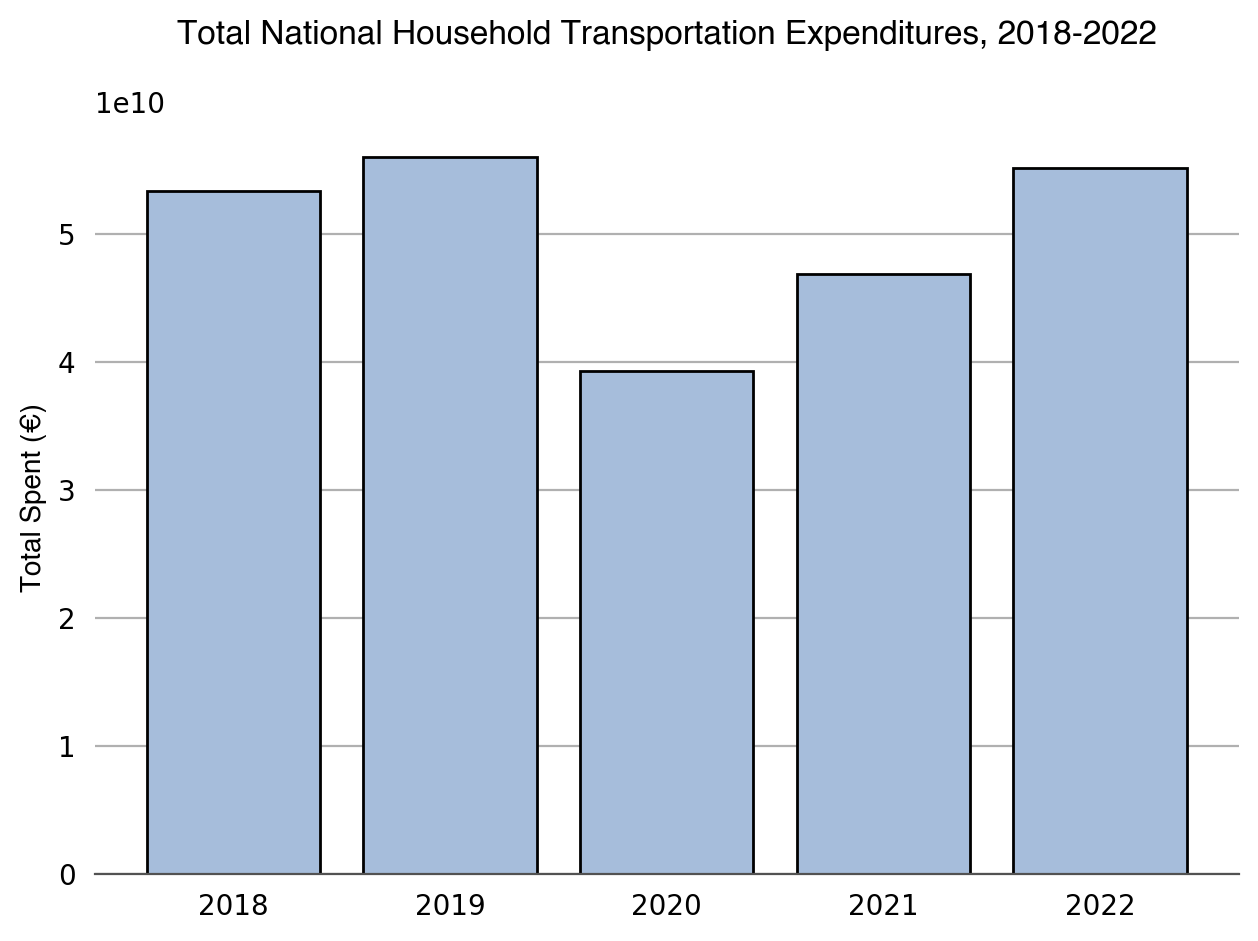

In [537]:

# plot expenses

y_label = 'Total Spent (€)'
title_ = 'Total National Household Transportation Expenditures, 2018-2022'








In [523]:
# Print numerical resutls
for i, year in enumerate(df_dict_keys):
    print(f'The total transportation spenging in Spain in {year} was: {transpExpense[i]:,}')

The total transportation spenging in Spain in 2018 was: 53,375,552,738.49
The total transportation spenging in Spain in 2019 was: 56,055,630,878.32
The total transportation spenging in Spain in 2020 was: 39,325,492,012.82
The total transportation spenging in Spain in 2021 was: 46,856,256,070.02
The total transportation spenging in Spain in 2022 was: 55,137,322,065.8


The second step is to calculate the proportion of total national household expenditures allocated to transportation. 

In [514]:
# Create transportation expenses % column 
df_HBS_all_pop['percentage_transportation'] = (
    df_HBS_all_pop['transportation_expenses'] * 100) / df_HBS_all_pop['GASTOMON']

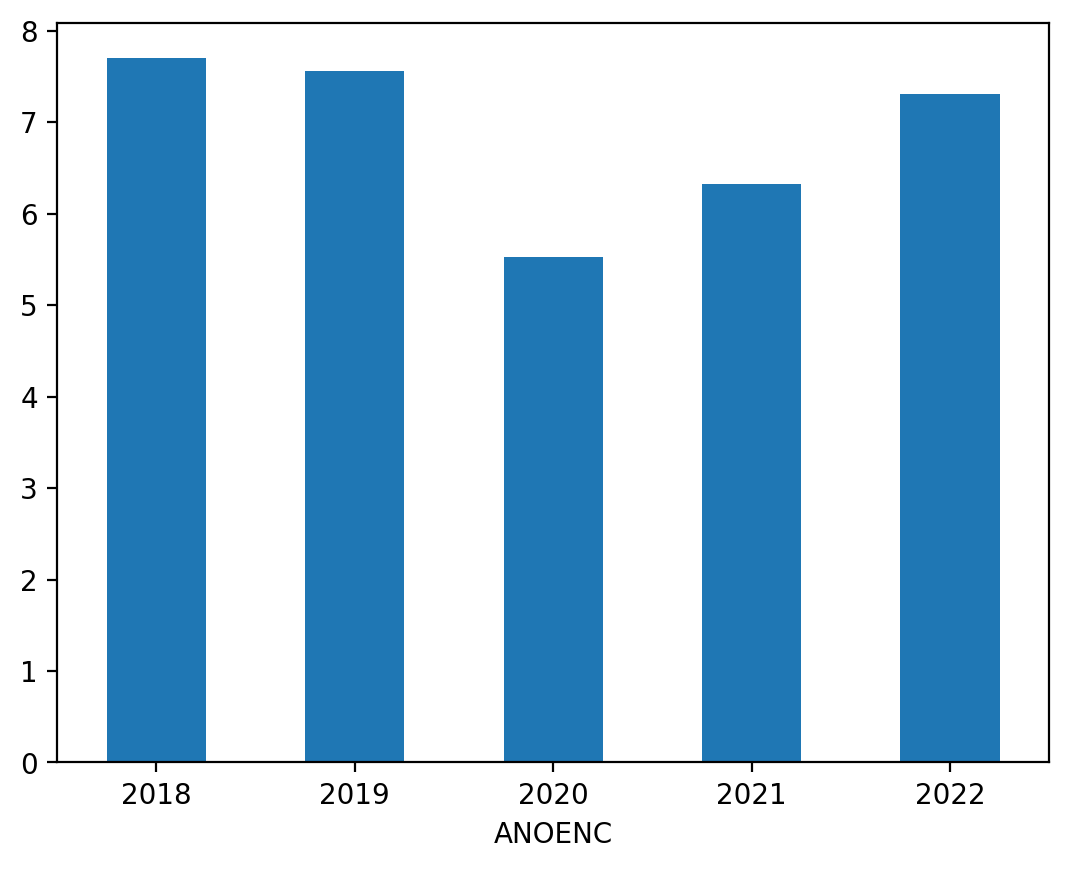

In [517]:
# Plot proportion of total expenditures
transp_perc = df_HBS_all_pop.groupby('ANOENC').percentage_transportation.median()
transp_perc.plot(kind = 'bar', rot = 0);

In [518]:
# Print values
transpPercentage = transp_perc.to_list()
for i, year in enumerate(df_dict_keys):
    print(f'The % of spendings allocated to transportation in {year} was: {transpPercentage[i]:,}')

The % of spendings allocated to transportation in 2018 was: 7.698595070176921
The % of spendings allocated to transportation in 2019 was: 7.556714695842519
The % of spendings allocated to transportation in 2020 was: 5.523945245795405
The % of spendings allocated to transportation in 2021 was: 6.326211242886952
The % of spendings allocated to transportation in 2022 was: 7.3051110777092125


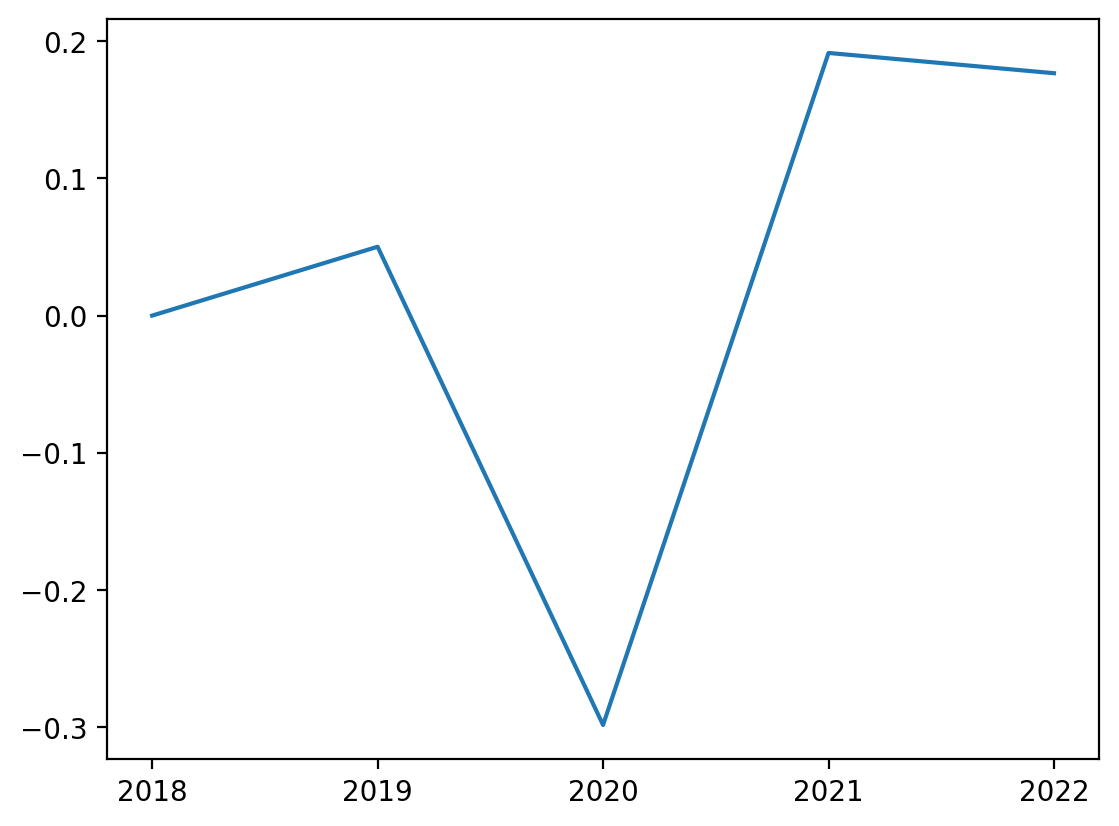

In [519]:
# Calculate year on year change 
relative_change = [0.0]
for i, yearExpense in enumerate(transpExpense):
    if i > 0:
        change = (transpExpense[i] - transpExpense[i-1]) / transpExpense[i-1]
        relative_change.append(change)

# Plot year on year change
plt.plot(df_dict_keys, relative_change);

> This plot shows the relative increasing and decreasing changes in the last few years.

**Are Urban inhabitants spending less?**

> This analysis will make use of the dictionaries holding urban data.

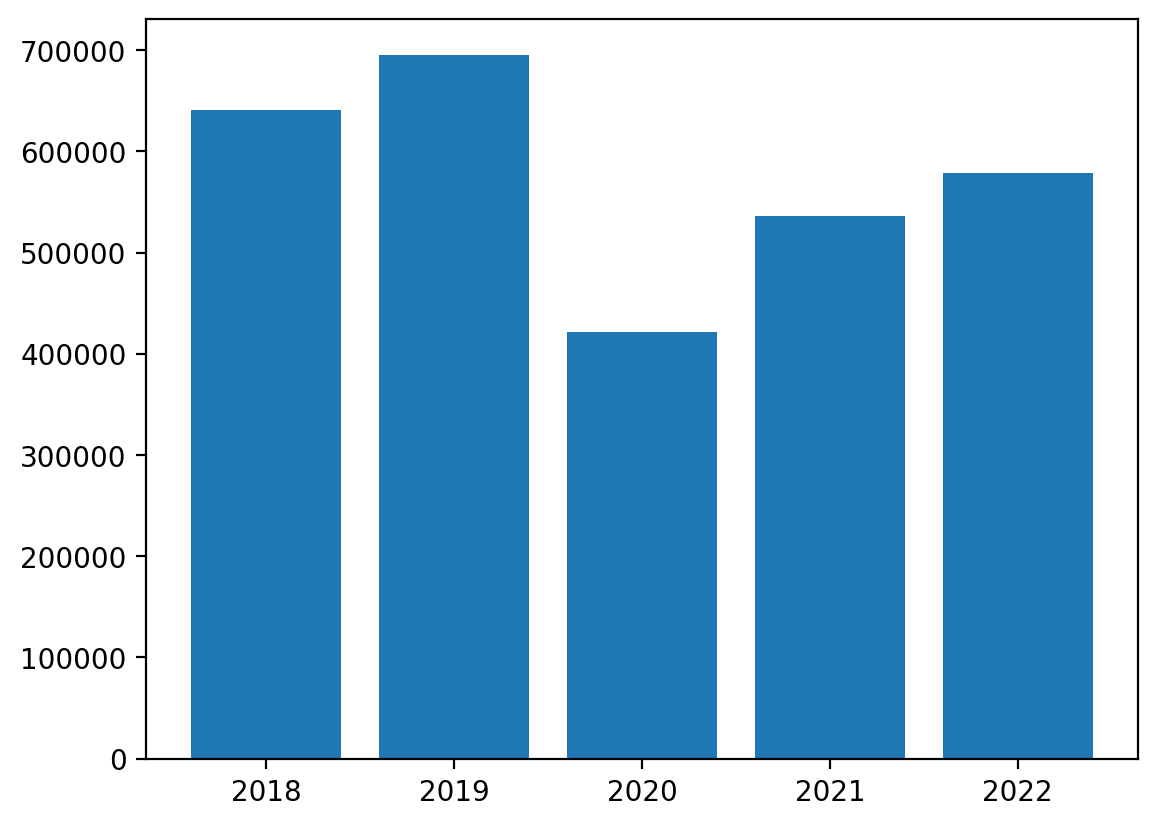

In [521]:
# Create a list with yearly transportation expenses
transpExpense_ = []
for year in df_dict_keys:
    expensesTransp_ = dict_df_HBS_urban[year][transport_codes].sum(axis=1)
    expensesTrransp_yearly_ = expensesTransp_.sum() # Get sum all transp. expenses
    transpExpense_.append(expensesTrransp_yearly_)
plt.bar(df_dict_keys, transpExpense_ );

> Same as the rest of the nation, residents of urban areas were and are on a rising trend of transportation expenditures.

#### 2. _Are we spending more on private cars (purchase and use)?_  

This question was translated to: Have there been significant changes in private car ownership and usage in the last five years?

The variables that could answer these questions imply the purchase or use of private vehicles.  
On the one hand, it could be interesting to see if the amount spent on buying new private cars has changed over the last five years. On the other hand, it could be interesting to look at spending on traditional vs alternative fuels.
Inflation and other economic factors can also affect these purchases, but these will not be considered in this analysis.  

_2.1 Exploration of private car purchases_

This question was answered by comparing the sample's car purchases statistically and the total population purchases visually.

**Statistical Comparison**

The first step is to check if the variables are normally distributed.

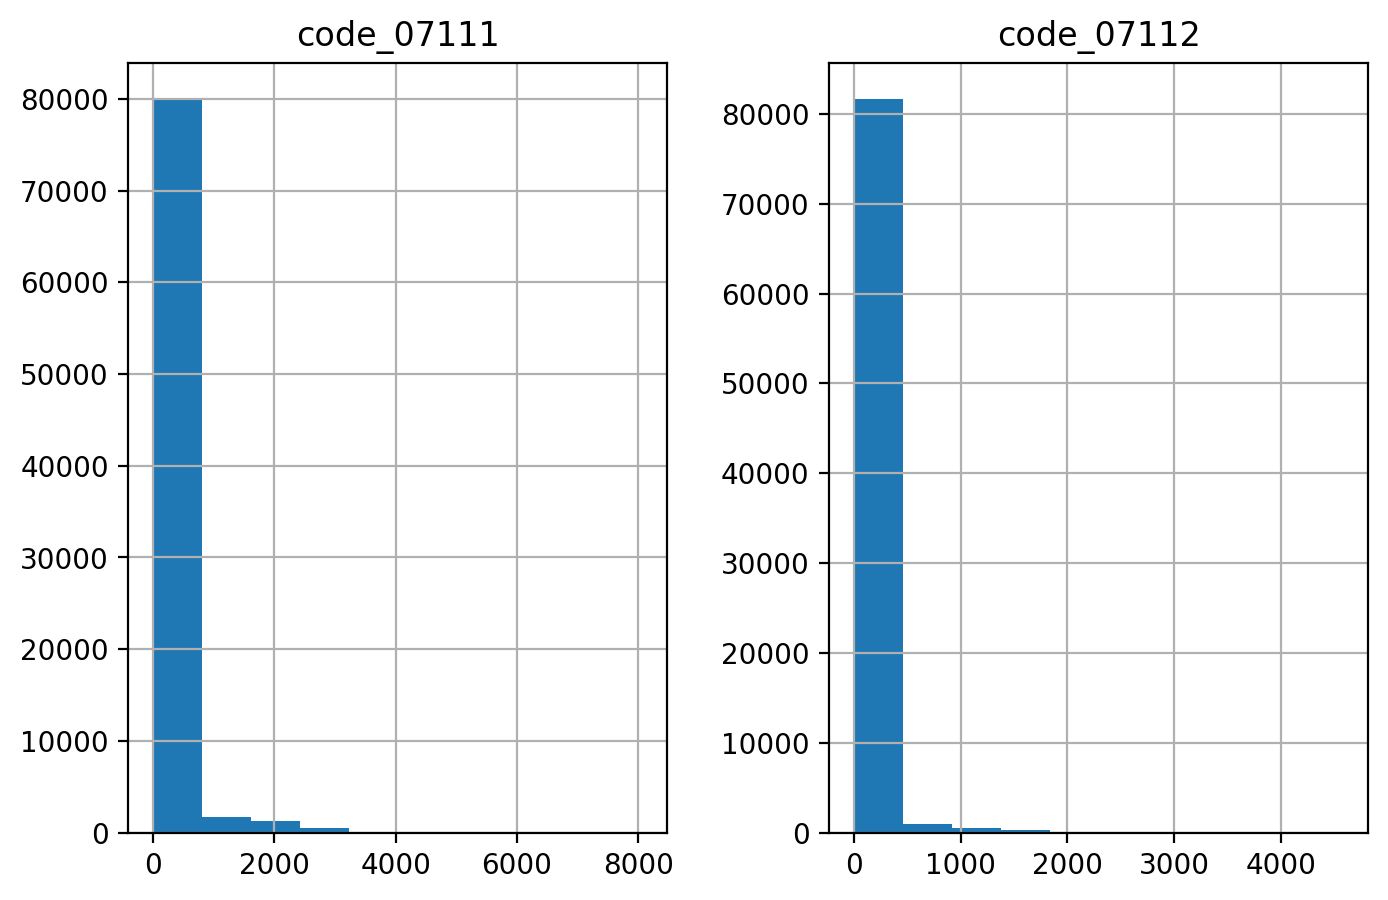

In [535]:
# Plot histogram
code_list_car_purchase = ['code_07111', 'code_07112']
df_HBS_all.hist(column = code_list_car_purchase, figsize = (8,5));

> These right-skewed histograms evidence that the variables are not normally distributed.

The samples from different years will be compared testing the following hypothesis:  
H<sub>o</sub> = samples belongs to same population  
H<sub>1</sub> = samples do not belong to same population  

As the expenditures are not normally distributed (shown in the histogram) the test employed to check their differences is the H-test.  
`The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes.`

In [157]:
# Test car purchases
stats.kruskal(dict_df_HBS['2018']['code_07111']+ dict_df_HBS['2018']['code_07112'], 
              dict_df_HBS['2019']['code_07111']+ dict_df_HBS['2019']['code_07112'], 
              dict_df_HBS['2020']['code_07111']+ dict_df_HBS['2020']['code_07112'], 
              dict_df_HBS['2021']['code_07111']+ dict_df_HBS['2021']['code_07112'], 
              dict_df_HBS['2022']['code_07111']+ dict_df_HBS['2022']['code_07112'])

KruskalResult(statistic=125.07530002178086, pvalue=4.3981986118945517e-26)

>The output shows that the test statistic is 125.075 and the corresponding p-value is 4.3981986118945517e-26 (close to 0).  
>Since the p-value is less than 0.05, we reject the null hypothesis of the H test.  
The tests sugest differences in the purchases of cars over the years but these differences cannot be attributed to the arrival of new mobility ways.

The other test will verify the existence of a trend.

Since the expenditures are time series with no stationality and the values are not so many the test employed to check for trends is the Mann-Kendall test. This test does not provide information on the magnitud of the trend.
`TThe Mann-Kendall statistical test for trend is used to assess whether a set of data values is increasing over time or decreasing over time, and whether the trend in either direction is statistically significant.`

In [156]:
# Test car purchases
data = [(dict_df_HBS['2018']['code_07111']+ dict_df_HBS['2018']['code_07112']).sum(), 
              (dict_df_HBS['2019']['code_07111']+ dict_df_HBS['2019']['code_07112']).sum(), 
              (dict_df_HBS['2020']['code_07111']+ dict_df_HBS['2020']['code_07112']).sum(), 
              (dict_df_HBS['2021']['code_07111']+ dict_df_HBS['2021']['code_07112']).sum(), 
              (dict_df_HBS['2022']['code_07111']+ dict_df_HBS['2022']['code_07112']).sum()]
pymannkendall.original_test(data)

Mann_Kendall_Test(trend='no trend', h=False, p=0.80649594050734, z=-0.2449489742783178, Tau=-0.2, s=-2.0, var_s=16.666666666666668, slope=-75721.66038308729, intercept=2025576.5738926064)

The values are very little to provide more robust solutions but the result is that there is no evidence to afirm there is a trend.

**Visual inspection**

> All expenses and purchase of cars show left skewed distribution with the  majority of households from the sample not spending or spending little.

In [158]:
# Get total population expenditures using spatial weight and multiplying by 12
def GetExpenses(dict_:dict, years:list, codeList:list, Factor:str):
        '''
        INPUT: 
        dict_- Dictionary with DataFrames
        years - list of years to analize
        codeList - list with codes to be added
        Factor - spatial weight


        OUTPUT: 
        series expenses of anual expenses (multiplied by 12) 
        for whole population (multiplied by factor).
        '''
        # creation of series
        total_expenses_list = []
        for year in years:
                total_expense_year = 0
                if len(codeList) == 1:
                        anual_expense1 = (dict_[year][codeList[0]]* 12)*(
                                dict_[year][Factor])
                        total_expense_year = anual_expense1.sum()
                        total_expenses_list.append(total_expense_year)
                else:
                        for i in range(len(codeList)):
                                anual_expense1 = (dict_[year][codeList[i]]* 12)*(
                                        dict_[year][Factor])
                                total_expense_1 = anual_expense1.sum()
                                total_expense_year += total_expense_1
                        total_expenses_list.append(total_expense_year)
        print(total_expenses_list)
        colors = ['#7fc97f', '#beaed4', '#fdc086','#386cb0']
        plt.bar(years,total_expenses_list, color = random.choice(colors));
        return total_expenses_list

[21045368607.239998, 23105188648.899998, 17177735689.48, 18691055897.22, 19989635903.269997]


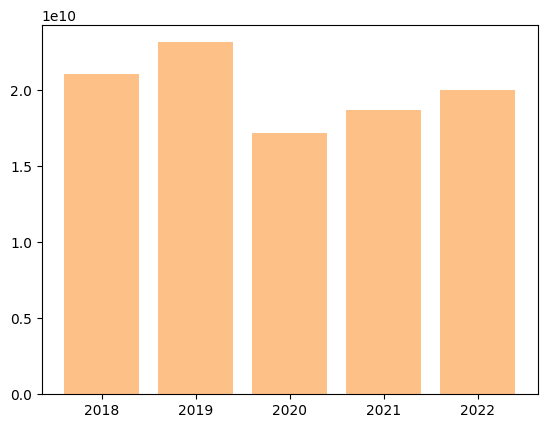

In [159]:
# Get total spending on car purchase for total population
code_list_car_purchase = ['code_07111', 'code_07112']
total_expenses_privateCar = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_car_purchase, 'FACTOR_y')

In [170]:
# Test function
expenses = dict_df_HBS_all_expenses['2018'][dict_df_HBS_all_expenses['2018']['CODIGO'] == '07111']
expenses_ = dict_df_HBS_all_expenses['2018'][dict_df_HBS_all_expenses['2018']['CODIGO'] == '07112']
x = expenses.GASTOMON.sum()
y = expenses_.GASTOMON.sum()
x+y

expenses = dict_df_HBS_all_expenses['2022'][dict_df_HBS_all_expenses['2022']['CODIGO'] == '07111']
expenses_ = dict_df_HBS_all_expenses['2022'][dict_df_HBS_all_expenses['2022']['CODIGO'] == '07112']
x = expenses.GASTOMON.sum()
y = expenses_.GASTOMON.sum()
x+y

19989635903.27

From the visual inspecion one cannot tell that expenditures on private cars are decreasing. On the contrary, the amount spent was rising before COVID-19 dropped then and now are on another raising trend. It is true that this displays the amount spent not the number of cars purchased.

**How about urban areas?**

[3408740111.87, 4121514400.6099997, 2602444990.7000003, 3466828505.49, 3280525463.6600003]


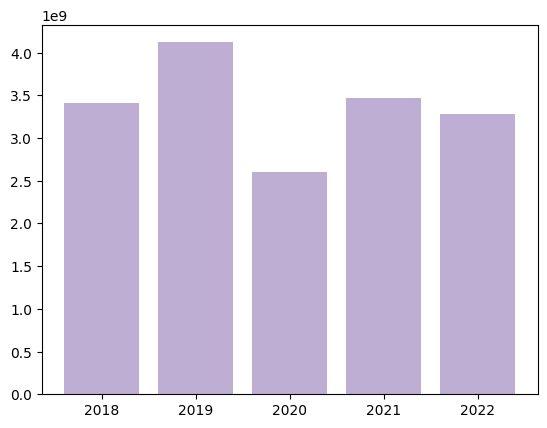

In [169]:
# Get total spending on car purchase for urban population
code_list_car_purchase = ['code_07111', 'code_07112']
total_expenses_privateCar = GetExpenses(dict_df_HBS_urban, dict_df_HBS_urban.keys(), 
                                        code_list_car_purchase, 'FACTOR_y')

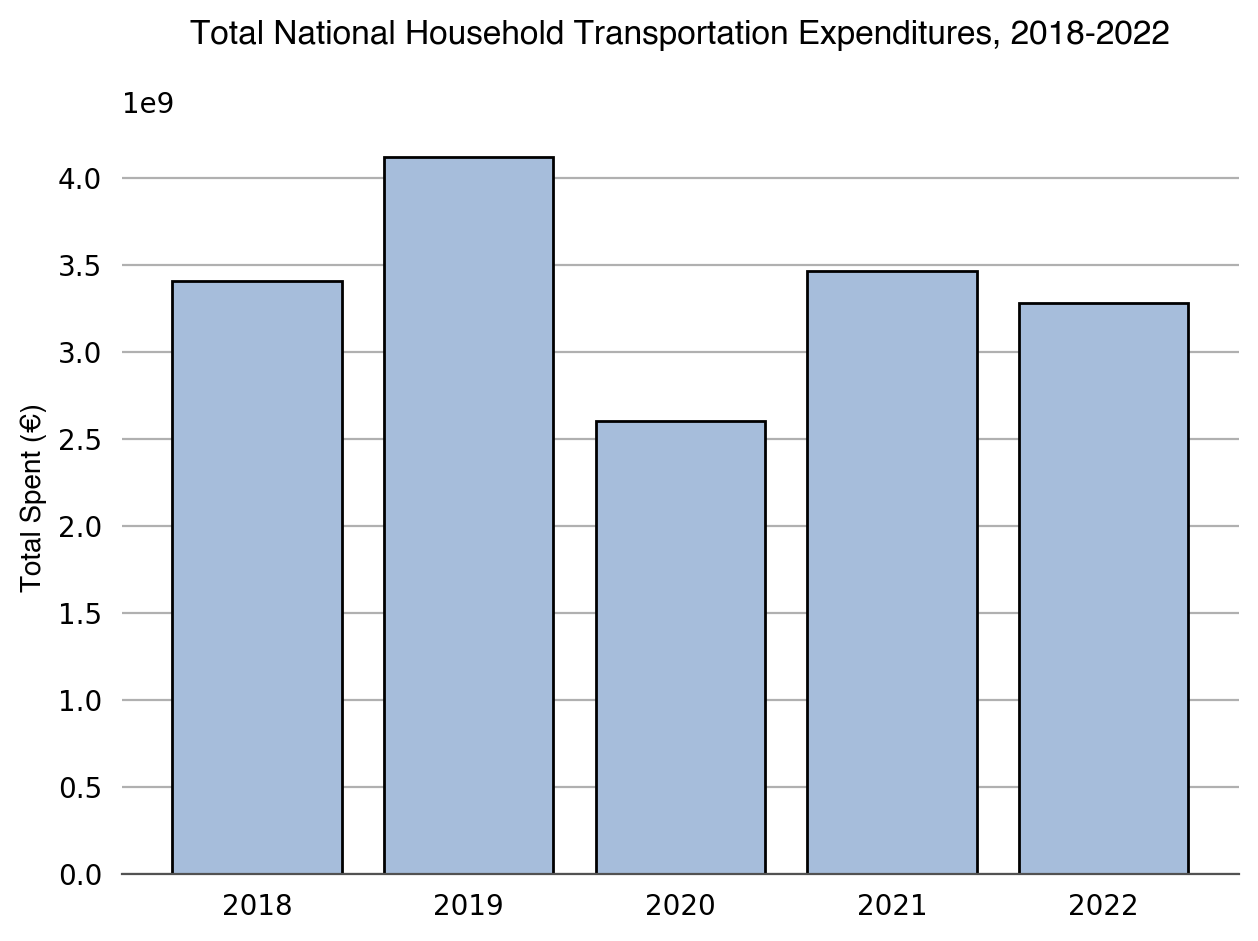

In [536]:
# Improve plot Urban population for article
# Plot expenses suitable for article
fig, ax = plt.subplots()

# Style
bar_colors = ['#2ca25f']
hfont = {'fontname':'Helvetica'}

# Plot
ax.bar(df_dict_keys, 
        total_expenses_privateCar, 
        label = bar_labels, 
        color=bar_colors,
        edgecolor='black')

ax.set_ylabel('Total Spent (€)',  **hfont)
ax.set_title('Total National Household Transportation Expenditures, 2018-2022', **hfont, y=1.08)

# Move scientific notation 
t = ax.yaxis.get_offset_text()
t.set_fontsize(10)
t.set_x(0)

# Improve grid settings
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#525252')

# Remove ticks
ax.tick_params(bottom=False, left=False)

# Set grid
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Better visualization
fig.tight_layout()

> Urban areas show different purchases tendencies than the overall population.

_2.2 Exploration of traditional vs alternative fuels spendings_

This question was answered comparing the trends and total spendings on traditional fuels and alternative fuels for the whole population.

**Visual inspection**

[23562759126.910004, 23852994414.940002, 16166396462.05, 20925365048.08, 27012945039.670002]


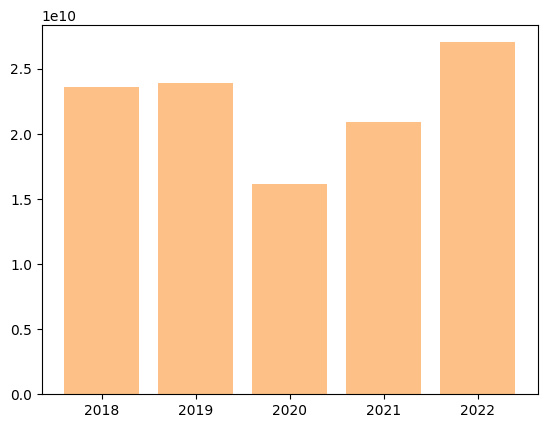

In [168]:
# Traditional fuel expenditure
code_list_fuel = ['code_07221', 'code_07222']
total_expenses_fuel = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_fuel, 'FACTOR_y')

> This plot shows the same tendencies seen before rising before and after COVID-19 but different in magnitudes. In this case the total spent in fuel in 2018 and 2019 were quite similar.

[17491495.34, 14587018.91, 33094679.630000003, 34270898.09, 50878726.39]


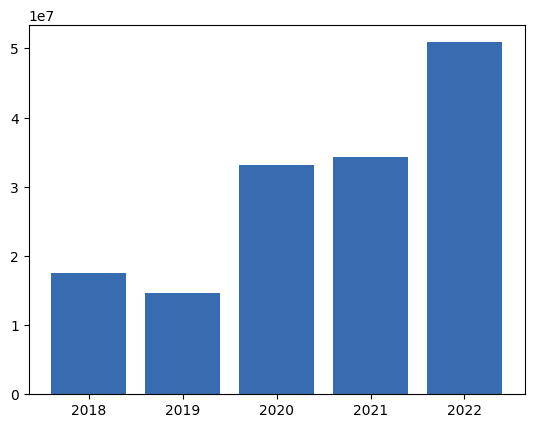

In [162]:
# Alternative fuels
code_list_alternative = ['code_07223']
total_expenses_altFuel = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_alternative, 'FACTOR_y')

This shows a different history. This plot shows an increase in the purchase of alternative fuels over the years.  
Inflation also plays a huge rol here.
It is important to notice that the fuel spending is around 1x10^<sup>10</sup> and alternative fuel spending 1x10<sup>7</sup> .

**Urban Areas**

[4098692583.51, 4044966716.63, 2669752074.41, 3401878729.8999996, 4306765596.54]


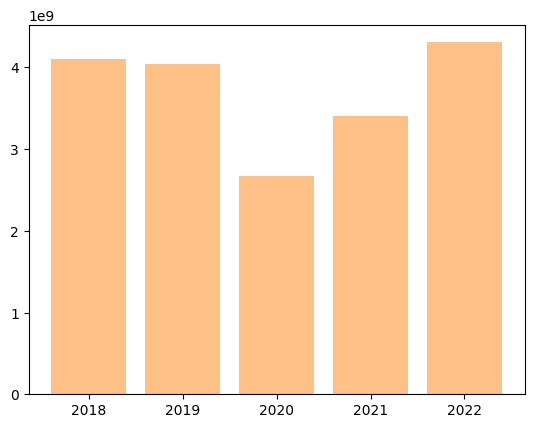

In [163]:
# Get total spending on car usage for urban population
code_list_fuel = ['code_07221', 'code_07222']
total_expenses_privateCar = GetExpenses(dict_df_HBS_urban, dict_df_HBS_urban.keys(), 
                                        code_list_fuel, 'FACTOR_y')

> These are similar to the results of the whole population.

*2.3 Exploration of Driving licences and private vehicle circulatory tax spendings*

**Statistical Comparison**

In [171]:
# Test driving licences
stats.kruskal(dict_df_HBS['2018']['code_07244'], dict_df_HBS['2019']['code_07244'], dict_df_HBS['2020']['code_07244'], dict_df_HBS['2021']['code_07244'], dict_df_HBS['2022']['code_07244'])

KruskalResult(statistic=200.5711956453368, pvalue=2.8318219715746434e-42)

The output shows that the test statistic is 200.57 and the corresponding p-value is 7.56028150286148e-24 (close to 0).  
Since the p-value is less than .05, we reject the null hypothesis of the H test.  
The tests sugest differences in the obtention of driving licenses over the years but these differences cannot be attributed to the arrival of new mobility ways.

**Visual inspection**

[873234738.3199999, 1002134778.8400002, 772427439.6199999, 1016163116.28, 951832964.51]


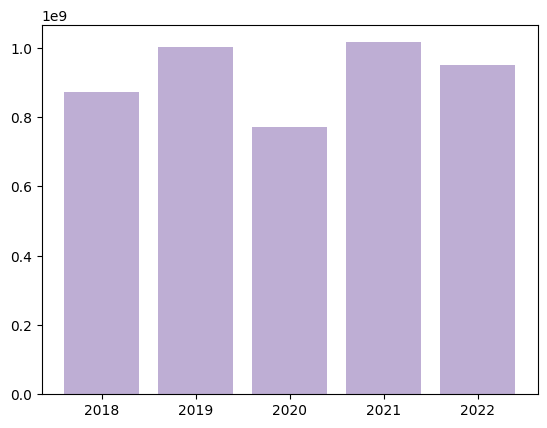

In [164]:
# Driving license 
code_list_driving = ['code_07244']
total_expenses_drivngLicence = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_driving, 'FACTOR_y')

This one shows rising tendency before covid then up in 2021 and could seem as if it was decreasing.

[640135606.5400001, 648682078.17, 626279699.26, 672186639.6999999, 705255389.7299999]


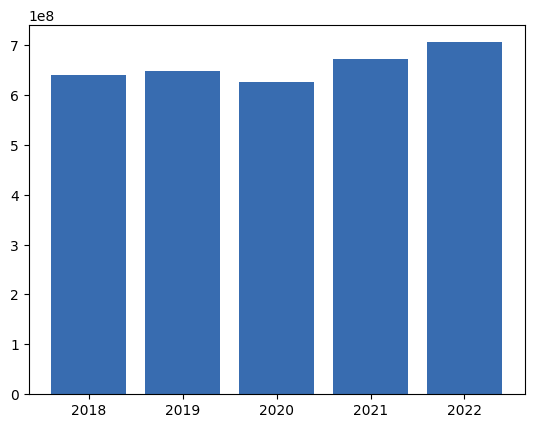

In [165]:
# Circulatory tax
code_list_ITV = ['code_07245']
total_expenses_ITV = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_ITV, 'FACTOR_y')

*2.4 Has the share on incompe spent on owning and runing motor vehicles changed over the years?*

Now the percentage of income spent on owning and running motor vehicles will be obtained.

In [172]:

# plot share of income spent on car usage

def scatter_plot(dict_df, year):
# set bench values
    transport_expenditure = 15 # 15% of total income spent in transportation
    median_income = dict_df[year]['IMPEXAC'].median()


    #variables
    x = dict_df[year]['IMPEXAC']
    y = dict_df[year]['percentage_income']

    dict_x_conditions = [x.where(x < median_income), 
                        x.where(x > median_income),
                        x.where(x < median_income),
                        x.where(x > median_income)
                    ]

    dict_y_conditions = [y.where(y < transport_expenditure), 
                    y.where(y < transport_expenditure),
                    y.where(y > transport_expenditure),
                    y.where(y > transport_expenditure)
                    ]
    fig, ax = plt.subplots()

    colors = ['#fd8d3c', '#fecc5c', '#2c7fb8', '#253494']
    legend_ = ['Low Income, Low Costs',
            'Higher Income, Low Costs',
            'Low Income, High Costs',
            'Higher Income, High Costs'
            ]
    s = 10

    # Plot
    for i in range(len(colors)):
                            ax.scatter(dict_x_conditions[i], 
                            dict_y_conditions[i], 
                            s = s,
                            c = colors[i], 
                            alpha = .3)

    # Benchmark Mean values          
    ax.axhline(y = transport_expenditure, color = 'red', linewidth=1)           
    ax.axvline(x = median_income, color = 'red', linewidth = 1);

    ax.legend(legend_)
    plt.title(year)
    plt.show()
    return plt

In [173]:
# Create car mobility variable
for year in df_dict_keys:
    dict_df_HBS[year]['carMobility'] = dict_df_HBS[year]['code_07111'] 
    + dict_df_HBS[year]['code_07112'] + dict_df_HBS[year]['code_07221']
    + dict_df_HBS[year]['code_07222']

In [174]:
# Look at basic statistics for private car mobility
dict_df_HBS[year]['carMobility'].describe()

count    16809.000000
mean        69.294156
std        401.937896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6666.666667
Name: carMobility, dtype: float64

In [175]:
# Look at basic income statistics 
dict_df_HBS[year]['IMPEXAC'].describe()

count    16809.000000
mean      2553.049259
std       1413.327925
min          0.000000
25%       1643.000000
50%       2298.000000
75%       3218.000000
max      15873.000000
Name: IMPEXAC, dtype: float64

In [176]:
# Get share of income spent on 'owning and running motor vehicles'
income_percentage = []
for year in df_dict_keys:
    dict_df_HBS[year].loc[:,'percentage_income'] = (dict_df_HBS[year]['carMobility'] * 100) \
                                                    / dict_df_HBS[year]['IMPEXAC']

In [188]:
# Print mean percentage of income for all years
for year in df_dict_keys:
    print(dict_df_HBS[year].loc[:,'percentage_income'].mean())

inf
inf
2.9666865347171285
2.9536024843064377
2.4954666380825676


> Infinite values are caused by households that have 0 as a salary.

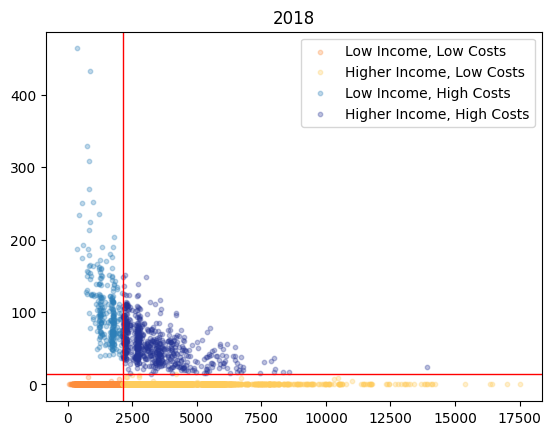

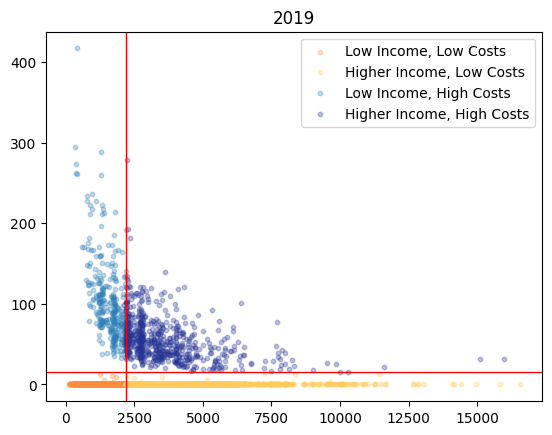

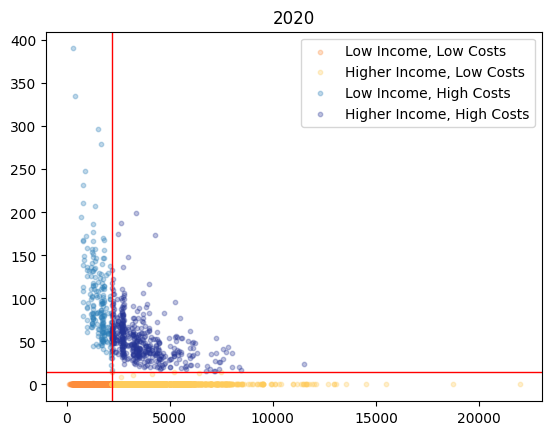

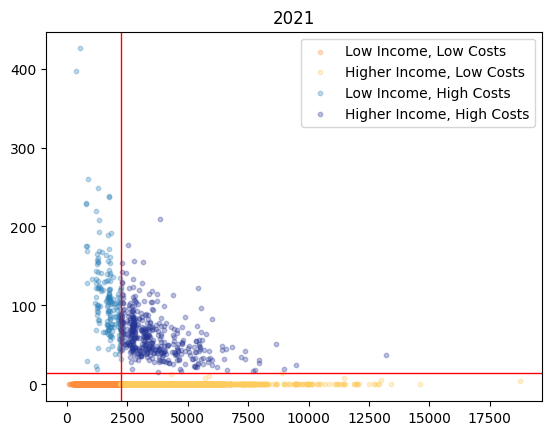

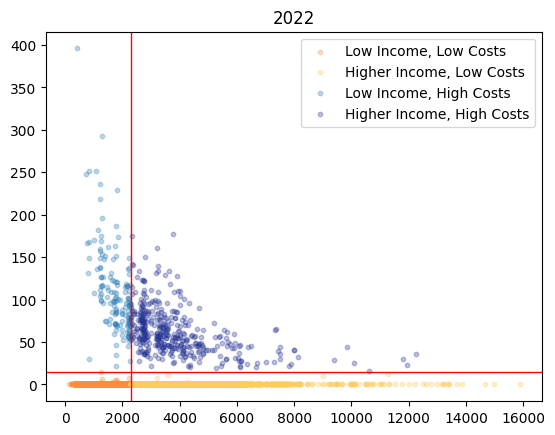

In [177]:
# Plot
for year in df_dict_keys:
    scatter_plot(dict_df_HBS, year)

**Urban Areas**

In [223]:
# Create car mobility variable (urban areas)
for year in df_dict_keys:
    dict_df_HBS_urban[year]['carMobility'] = dict_df_HBS_urban[year]['code_07111'] 
    + dict_df_HBS_urban[year]['code_07112'] + dict_df_HBS_urban[year]['code_07221']
    + dict_df_HBS_urban[year]['code_07222']

In [182]:
# Get share of income spent on 'owning and running motor vehicles' (urban areas)
income_percentage = []
for year in df_dict_keys:
    dict_df_HBS_urban[year].loc[:,'percentage_income'] = (dict_df_HBS_urban[year]['carMobility'] * 100) \
                                                    / dict_df_HBS_urban[year]['IMPEXAC']

In [187]:
for year in df_dict_keys:
    print(dict_df_HBS_urban[year].loc[:,'percentage_income'].mean())

2.7608330297522743
3.281268449888949
1.9913252614155965
2.839295181527832
2.1542477834109284


#### 3. Are Personal Mobility Vehicles purchases (kickscooters, bikes, etc.) on a rise?

_3.1 Exploration of personal mobility vehicles purchases_

**Statistical Comparison**

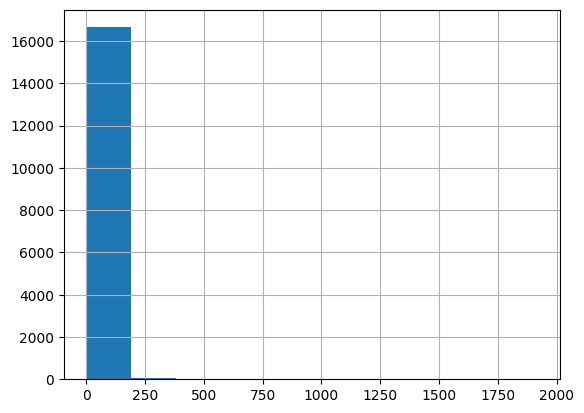

In [191]:
# Look at the distributio of the variable PMV purchase (code_07111)
dict_df_HBS['2022']['code_07120'].hist();

> Plots from different years and both PMV purchases (new and old) showed right skewed histograms.

The samples from different years will be compared testing the following hypothesis:  
H<sub>o</sub> = samples belongs to same population  
H<sub>1</sub> = samples do not belong to same population  

As before the test employed to check their differences is the H-test.  

In [192]:
# Test car purchases
stats.kruskal(dict_df_HBS['2018']['code_07120'], 
              dict_df_HBS['2019']['code_07120'], 
              dict_df_HBS['2020']['code_07120'], 
              dict_df_HBS['2021']['code_07120'], 
              dict_df_HBS['2022']['code_07120'])

KruskalResult(statistic=46.70683077356526, pvalue=1.7550942376579552e-09)

>The output shows that the test statistic is 46.70 and the corresponding p-value is 1.7550942376579552e-09 (close to 0).  
>Since the p-value is less than 0.05, we reject the null hypothesis of the H test.  
The tests sugest differences in the purchases of PMV; over the years.

**Visual inspection**

[1086993492.8500001, 1676430003.53, 1211877694.85, 1473865811.06, 1551879649.73]


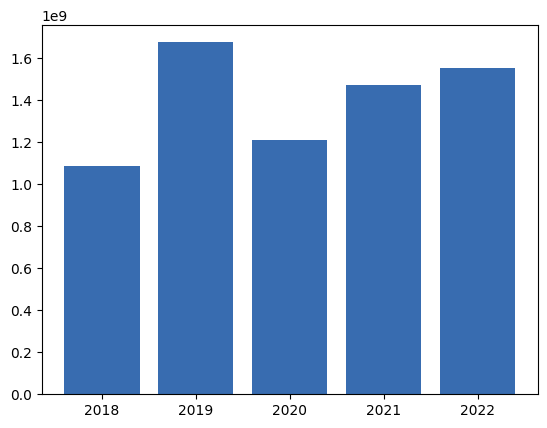

In [86]:
# Plot personal mobility purchases (total population)
code_list_PMV = ['code_07120', 'code_07130']
total_expenses_PMV = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_PMV, 'FACTOR_y')

Personal mobility vehicles display also the same tendencies: steep rising trend before 2020. Fall in 2020 and another rising period since COVID-19. The steep rise in the purchases of PTV from 2018 to 2019 seems proportionaly higher than the steep increase in car purchases from 2018 to 2019.

[210858053.3, 475336531.98, 260217517.83999997, 338038661.47, 306816245.59000003]


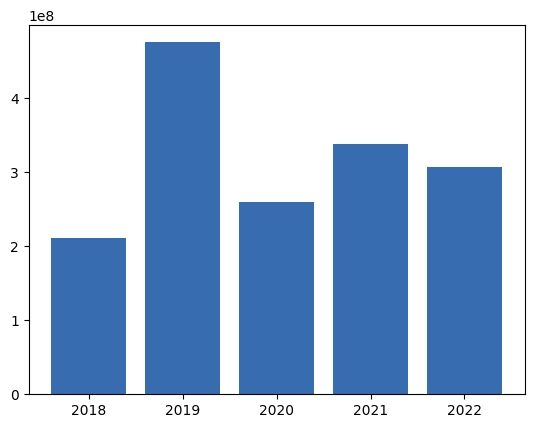

In [190]:
# Plot personal mobility purchases (urban population)
code_list_PMV = ['code_07120', 'code_07130']
total_expenses_PMV = GetExpenses(dict_df_HBS_urban, dict_df_HBS.keys(), 
                                        code_list_PMV, 'FACTOR_y')

> Urban areas show different purchase tendencies than overall population. Both share an increase in purchases from 2019 and drop during COVID-19. Opossed to the rest of the population the rising tendency did not continued up to 2022.

#### 4. Are combined public transportation tickets and shared options on the rise?

_4.1 Exploration of public transportation individual and combined tickets_

[1203363424.53, 1138884456.42, 552074697.21, 645311742.3, 749966903.99]


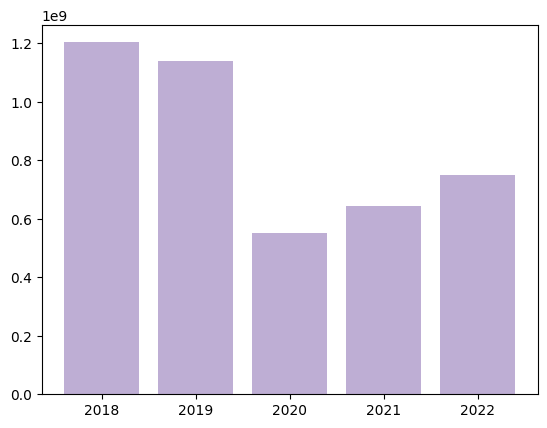

In [197]:
# Plot public transportation spendings (individual usage)
code_list_PT = ['code_07311', 'code_07313', 'code_07321']
total_expenses_urbanPT = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_PT, 'FACTOR_y')

[483198277.36, 493270226.8, 227503469.82999998, 275975219.15, 349595938.34000003]


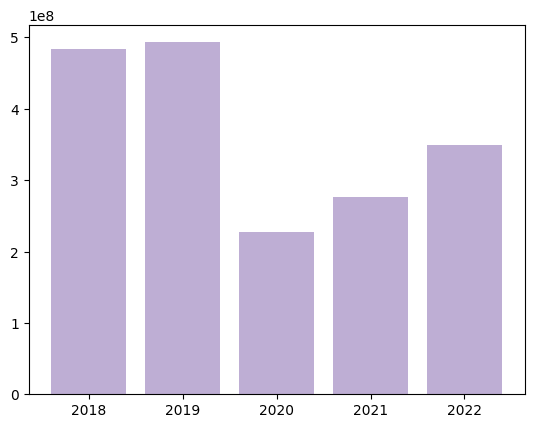

In [88]:
# Plot public transportation spendings (combined usage)
code_list_cPT = ['code_07322']
total_expenses_combinedPT = GetExpenses(dict_df_HBS, dict_df_HBS.keys(), 
                                        code_list_cPT, 'FACTOR_y')

**Urban Areas**

[358997208.93, 350158766.55, 162894302.57, 188789923.03, 200463210.59]


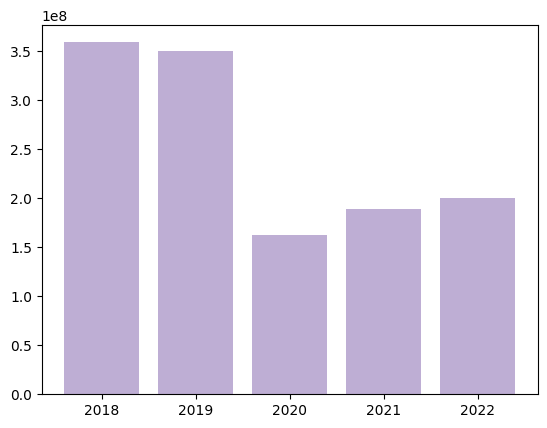

In [193]:
# Plot public transportation spendings (individual usage)- Urban areas
code_list_PT = ['code_07311', 'code_07313', 'code_07321']
total_expenses_urbanPT = GetExpenses(dict_df_HBS_urban, dict_df_HBS.keys(), 
                                        code_list_PT, 'FACTOR_y')

>Urban areas with access to micromobility services show a reduction in the total spent from 2018 to 2019 and a slow rising after COVID-19.

_4.2 Exploration of shared mobility options expenditures_

This only makes sense in the selected urban areas because the rest of the country does not have such services.

[319749600.18, 360623412.71999997, 239006224.23, 294020722.76, 286673873.2]


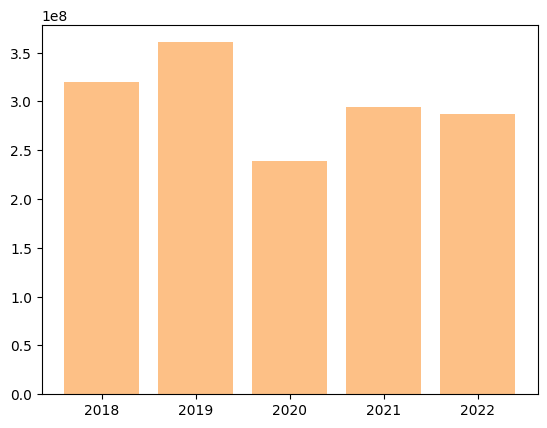

In [198]:
# Plot shared mobility expenditures
code_list_Shared = ['code_07324']
total_expenses_sharedMobility = GetExpenses(dict_df_HBS_urban, dict_df_HBS.keys(), 
                                        code_list_Shared, 'FACTOR_y')

> This plot is similar to the one showing Personal Mobility vehicles purchases for the urban population. rise before Covid and decreasing after that.

#### 4. What variables correlate well with car-oriented mobility?

This question requires the definition of car-oriented mobility in a response variables. The variables selected as descriptive of this are car purchases (old or new) and car usage (oil spending). These variables are going to be the response and others as the explanatory variables. The columns of interest need to bee selected and inspected.

In [199]:
# Look at dataframe's shape
for year in df_dict_keys:
    print(dict_df_HBS_urban['2019'].shape)

(3034, 38)
(3034, 38)
(3034, 38)
(3034, 38)
(3034, 38)


In [200]:
dict_df_HBS_urban['2019'].percentage_income.describe()

count    2515.000000
mean        3.281268
std        17.365954
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       416.666667
Name: percentage_income, dtype: float64

The dataframes have 35 columns each, as seen previously. All of them are stored as quantitative but some make no sense or are not stored in the right way. For instance 'NUMERO' is just the family ID and 'FACTOR' the spatial weight. The ones starting with *code_* are expenses, year is a date variable and so on. 

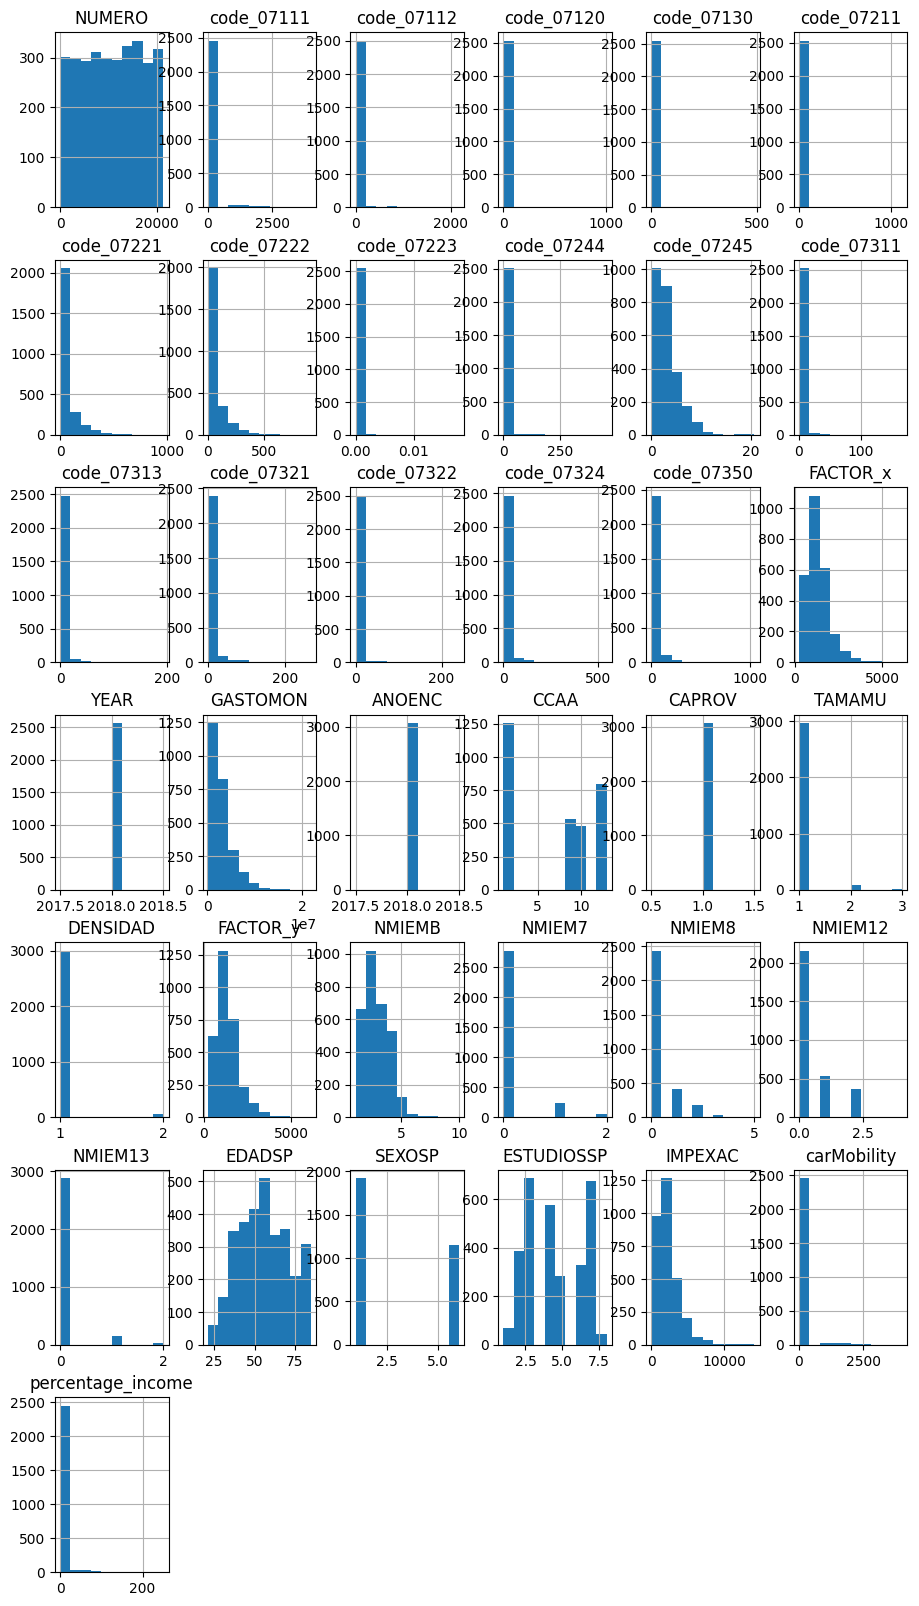

In [201]:
# Look at histograms
dict_df_HBS_urban['2018'].hist(figsize = (11,20));

The variables selected as response were the expenditures on new or old cars and fuel expenditure (this variable was defined earlier as _carMobility_). Other variables like driving's licence do not necesarily mean that the household owns a car.

> The variables selected for the study will be saved in a new dataframe too create a correlation matrix.

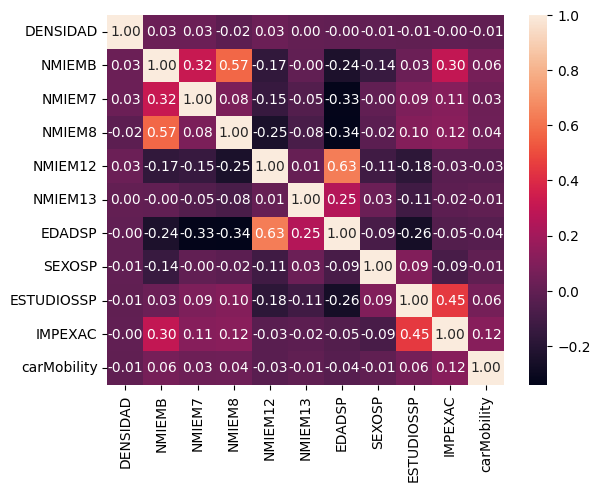

In [351]:
# Look at correlation matrix
x = dict_df_HBS_urban['2020'].loc[:, ['DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'carMobility']]

sns.heatmap(x.corr(), annot=True, fmt=".2f");

> None of the selected variables show great correlation with car expenditures.

The model applied will be a linear regresion considering the data to be cross-sectional. This means one model per year.

In [203]:
def split_fit_linearModel(control_X, response_y, test_size=.3, rand_state=42):

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = .30, random_state=42)

    # Fit model
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)

    # Predict  model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    # Score model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    # Get error
    squared_error_ = mean_squared_error(y_test, y_test_preds)

    print(f'The test score is {test_score} and the train score is {train_score}')
    return test_score, train_score

In [228]:
# Drop null values for newly created response
for year in df_dict_keys:
    dict_df_HBS_urban[year].dropna(axis = 0, inplace = True)

In [229]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_HBS_urban[year].loc[:,'carMobility']
    X = dict_df_HBS_urban[year].loc[:,['TAMAMU', 'DENSIDAD',
                                'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                'IMPEXAC']]
    # Run model
    split_fit_linearModel(X,y)

The test score is -0.0006053865918431711 and the train score is 0.011986450453366215
The test score is 0.005366590264420545 and the train score is 0.021684582144878672
The test score is 0.01683065337119205 and the train score is 0.014045270141539556
The test score is 0.007168048239982183 and the train score is 0.008064636287928861
The test score is 0.0057969093086790435 and the train score is 0.02819699240989859


> Seems like these variables explain very little of the reasons behind private car-based mobility.

Revising the literature on the subject it seems like mixing car purchases and car fuel expenditure is rarely done [referncias]; the first thing to help this model is to separate car purchases from fuel spending and model the second.  
Aditionaly the relationship with the expenditure is modeled as logarithmic. This means salary values have to be over 0.

In [230]:
# Modify response variable
for year in df_dict_keys:
    dict_df_HBS_urban[year]['df_fuelExpenditure'] = dict_df_HBS_urban[year]['code_07221']
    + dict_df_HBS_urban[year]['code_07222'] + dict_df_HBS_urban[year]['code_07223']

In [231]:
dict_df_HBS_urban[year]['df_fuelExpenditure'].describe()

count    2125.000000
mean       58.472858
std       136.908637
min         0.000000
25%         0.000000
50%         0.000000
75%        17.700592
max       992.083852
Name: df_fuelExpenditure, dtype: float64

In [232]:
# Select households with salary higher than 0
new_dfs = []
for year in df_dict_keys:
    df = dict_df_HBS_urban[year].loc[dict_df_HBS_urban[year]['IMPEXAC'] > 0]
    new_dfs.append(df)
dict_df_EPFSalaries = dict(zip(df_dict_keys, new_dfs))

In [233]:
for year in df_dict_keys:
    dict_df_EPFSalaries[year] = dict_df_EPFSalaries[year].copy()
    dict_df_EPFSalaries[year].loc[:,'log_netIncome'] = np.log(dict_df_EPFSalaries[year]['IMPEXAC'])

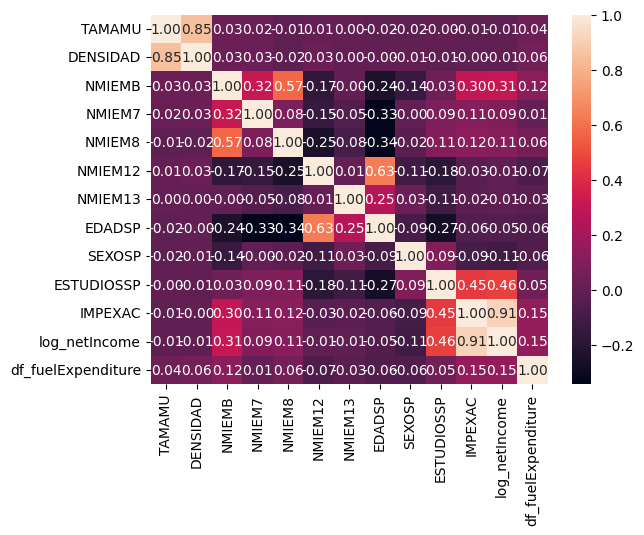

In [235]:
# Look at correlation matrix
df_ = dict_df_EPFSalaries['2020'].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'log_netIncome', 'df_fuelExpenditure']]

sns.heatmap(df_.corr(), annot=True, fmt=".2f");

Seems like the income's logarithm indeed correlates better to fuel expenditure.

In [236]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_EPFSalaries[year].loc[:,'df_fuelExpenditure']
    X = dict_df_EPFSalaries[year].loc[:,['TAMAMU', 'DENSIDAD',
                                        'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                        'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                        'log_netIncome', 'CAPROV_bool']]
    # Run model
    split_fit_linearModel(X,y)


The test score is 0.05298029428960105 and the train score is 0.06363439474477595
The test score is 0.04773222160575297 and the train score is 0.05451553977540813
The test score is 0.0427900652119898 and the train score is 0.03985239774727467
The test score is 0.0014591059570143727 and the train score is 0.03295428582369897
The test score is -0.046699101469989124 and the train score is 0.060058196483100734


With these changes we are able to explain up to a 8.4% of the variability in household fuel expenditures. The model prediction is not good but seems like there is no overfitting. Perhaps changing the equation could improve the equation or adding other relevant variables. In this case the prediction will be left as this and will not be included in the final report.

In [237]:
# Modify response variable to be fuel expenditure's natural log
new_dfs_log_Fuel = []
for year in df_dict_keys:
    df = dict_df_HBS_urban[year].loc[dict_df_HBS_urban[year]['df_fuelExpenditure'] > 0]
    new_dfs_log_Fuel.append(df)
dict_df_EPF_logExpenditures = dict(zip(df_dict_keys, new_dfs_log_Fuel))

In [238]:
for year in df_dict_keys:
    dict_df_EPF_logExpenditures[year] = dict_df_EPF_logExpenditures[year].copy()
    dict_df_EPF_logExpenditures[year]['df_log_fuelExpenditure'] = np.log(
        dict_df_EPF_logExpenditures[year]['df_fuelExpenditure'])

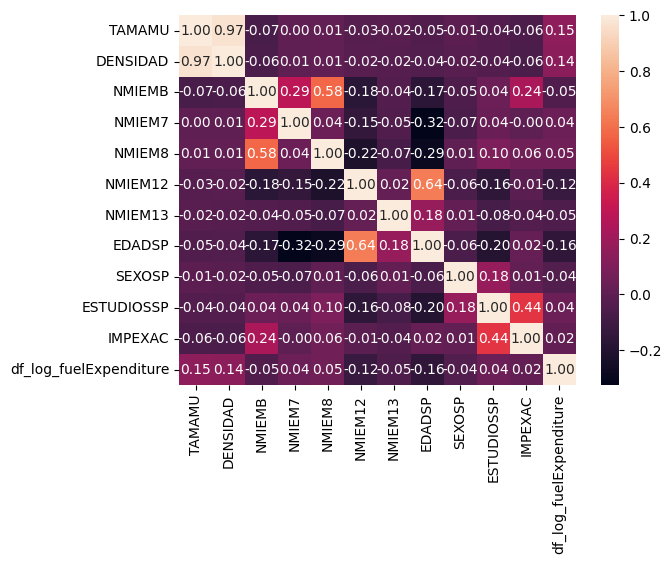

In [239]:
# Look at correlation matrix
x = dict_df_EPF_logExpenditures[year].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'df_log_fuelExpenditure']]

sns.heatmap(x.corr(), annot=True, fmt=".2f");

> Some variables' influence on the response have increased with the modification.

In [240]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_EPF_logExpenditures[year].loc[:,'df_log_fuelExpenditure']
    X = dict_df_EPF_logExpenditures[year].loc[:,['TAMAMU', 'DENSIDAD',
                                        'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                        'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                        'IMPEXAC', 'CAPROV_bool']]
    # Run model
    split_fit_linearModel(X,y)

The test score is 0.07411924886010357 and the train score is 0.11342359552604242
The test score is 0.0463820294269629 and the train score is 0.06805656493928913
The test score is 0.0001763529061006297 and the train score is 0.026158595250893146
The test score is -0.006486901648534937 and the train score is 0.10305102478321337
The test score is 0.011040484603758838 and the train score is 0.06853757594908472


That did not substantially improved the model. One last try will use the Salary's log to try to infer the fuel expenditure's log.

In [243]:
# Modify explanatory variable 'Salary' to be its natural log
new_dfs_loglog = []
for year in df_dict_keys:
    df = dict_df_HBS_urban[year].loc[(dict_df_HBS_urban[year]['IMPEXAC'] > 0) & (
        dict_df_HBS_urban[year]['df_fuelExpenditure'] > 1)]
    new_dfs_loglog.append(df)
dict_df_EPF_loglog = dict(zip(df_dict_keys, new_dfs_loglog))

In [244]:
# Define new response
for year in df_dict_keys:
    dict_df_EPF_loglog[year] = dict_df_EPF_loglog[year].copy()
    dict_df_EPF_loglog[year]['df_log_fuelExpenditure'] = np.log(
        dict_df_EPF_loglog[year]['df_fuelExpenditure'])

In [245]:
# Modify new explanatory variable
for year in df_dict_keys:
    dict_df_EPF_loglog[year] = dict_df_EPF_loglog[year].copy()
    dict_df_EPF_loglog[year]['df_log_salary'] = np.log(
        dict_df_EPF_loglog[year]['IMPEXAC'])

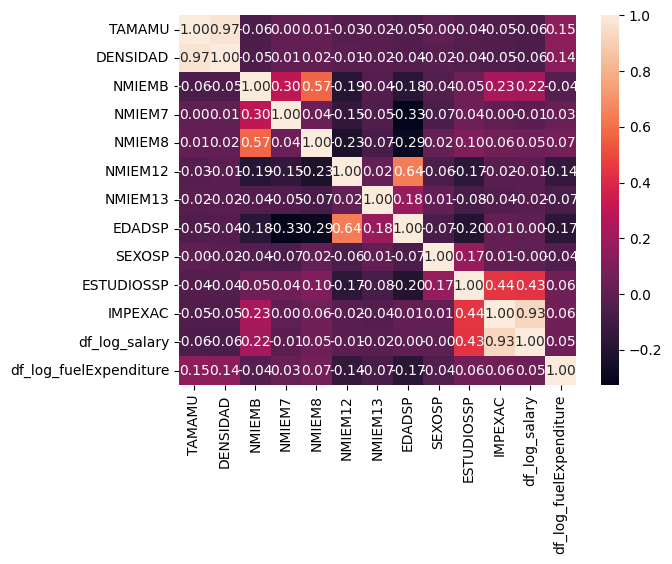

In [247]:
# Look at correlation matrix
x = dict_df_EPF_loglog[year].loc[:, ['TAMAMU', 'DENSIDAD',
    'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
    'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' ,
    'IMPEXAC', 'df_log_salary', 'df_log_fuelExpenditure']]

sns.heatmap(x.corr(), annot=True, fmt=".2f");

> Seems like the response variable is more correlated to the salary's log than the original variable.

In [248]:
# Create x matrix and y vector
for year in df_dict_keys:
    y = dict_df_EPF_loglog[year].loc[:,'df_log_fuelExpenditure']
    X = dict_df_EPF_loglog[year].loc[:,['TAMAMU', 'DENSIDAD',
                                        'NMIEMB', 'NMIEM7', 'NMIEM8', 'NMIEM12', 
                                        'NMIEM13', 'EDADSP', 'SEXOSP', 'ESTUDIOSSP' , 
                                        'df_log_salary', 'CAPROV_bool']]
    # Run model
    split_fit_linearModel(X,y)

The test score is 0.1227346737609053 and the train score is 0.11188002760077298
The test score is 0.09186707646134229 and the train score is 0.07358607953484764
The test score is -0.02721310504975838 and the train score is 0.041926164366641094
The test score is 0.04286844399423129 and the train score is 0.0820458248312238
The test score is 0.02521889705205671 and the train score is 0.07733181413684742


> This has improved the prediction by aproximately a point.

#### 6.	_Are new mobility trends allowing us to spend less?_

This question will segregate the dataset into households that own a car and those that do not. The purpose of the segmentation is to see which users combine their traditional mobility with shared mobility, those who own a car and replace car trips with them or those that do not own acar and replace public transportation mobility with them. This exploration is very superficial because the trip replacement theory is not certain but it could be a good initial aproximation.

In [264]:
# Create variable with fuel expenditure
fuel_codes = ['code_07221', 'code_07222', 'code_07223']
df_HBS_urban['df_fuelExpenditure'] = df_HBS_urban[fuel_codes].sum(axis=1)

car_codes = ['code_07111', 'code_07112']
# Create variable with car purchase
df_HBS_urban['car_purchase'] = df_HBS_urban[car_codes].sum(axis=1)

In [331]:
# Create new DataFrame with houses without fuel and car expenditures
df_HBS_urban_nocar = df_HBS_urban.loc[(
    df_HBS_urban['df_fuelExpenditure'] <= 0) & (df_HBS_urban['car_purchase']<= 0)]

households_noCar_iD = df_HBS_urban_nocar.NUMERO.to_list()

df_HBS_urban_car = df_HBS_urban.query("NUMERO not in @households_noCar_iD")


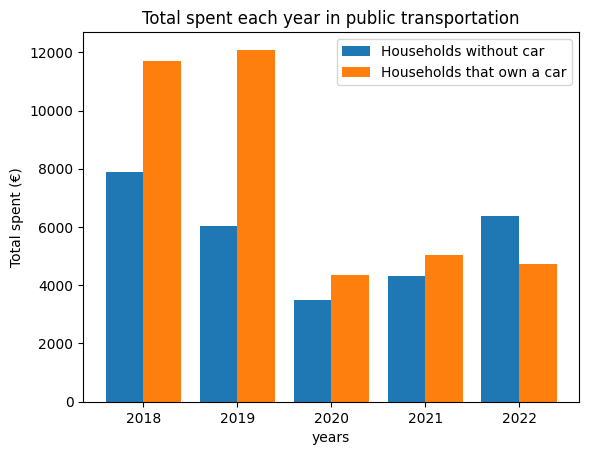

In [336]:
# Plot both DataFrames
code_list_PT = ['code_07311', 'code_07313', 'code_07321']
df_HBS_urban_nocar.loc[:,'public_transportation'] = df_HBS_urban_nocar[code_list_PT].sum(axis=1)
df_HBS_urban_car.loc[:,'public_transportation'] = df_HBS_urban[code_list_PT].sum(axis=1)

x = np.array(df_dict_keys, dtype = int)
Y1 = np.array(df_HBS_urban_nocar.groupby(['ANOENC'])['public_transportation'].sum(), dtype = float)
Y2 = np.array(df_HBS_urban_car.groupby(['ANOENC'])['public_transportation'].sum().to_list(), dtype = float)

plt.bar(x - 0.2, Y1, 0.4,  label = 'Households without car')
plt.bar(x + 0.2 , Y2, 0.4, label = 'Households that own a car')
  
#plt.xticks(X_axis, X)
plt.xlabel("years")
plt.ylabel("Total spent (€)")
plt.title("Total spent each year in public transportation")
plt.legend()
plt.show();

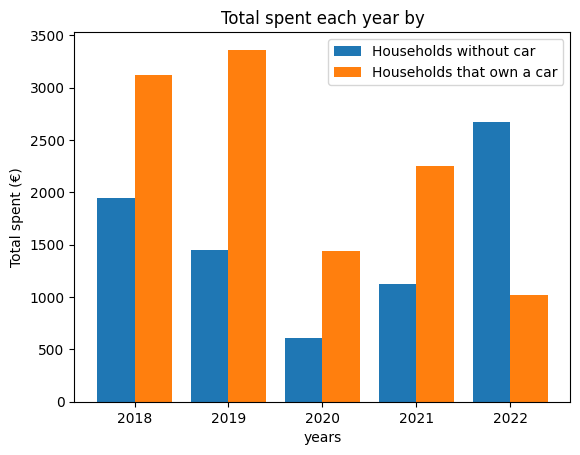

In [338]:
# Plot both DataFrames
code_list_cPT = ['code_07322']

x = np.array(df_dict_keys, dtype = int)
Y1 = np.array(df_HBS_urban_nocar.groupby(['ANOENC'])['code_07322'].sum(), dtype = float)
Y2 = np.array(df_HBS_urban_car.groupby(['ANOENC'])['code_07322'].sum().to_list(), dtype = float)

plt.bar(x - 0.2, Y1, 0.4,  label = 'Households without car')
plt.bar(x + 0.2 , Y2, 0.4, label = 'Households that own a car')
  
#plt.xticks(X_axis, X)
plt.xlabel("years")
plt.ylabel("Total spent (€)")
plt.title("Total spent each year by")
plt.legend()
plt.show();

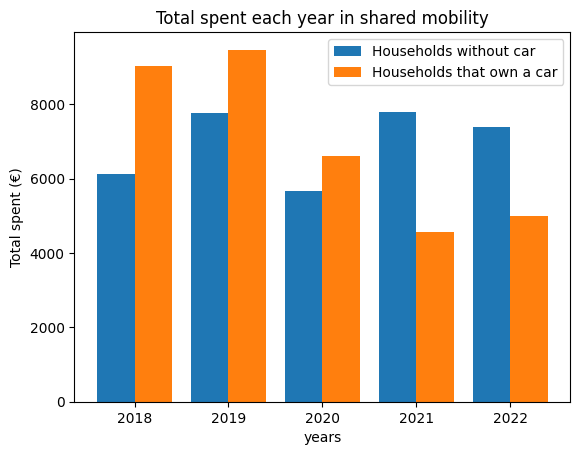

In [340]:
# Plot both DataFrames
shared_mobility = ['code_07324']

x = np.array(df_dict_keys, dtype = int)
Y1 = np.array(df_HBS_urban_nocar.groupby(['ANOENC'])['code_07324'].sum(), dtype = float)
Y2 = np.array(df_HBS_urban_car.groupby(['ANOENC'])['code_07324'].sum().to_list(), dtype = float)

plt.bar(x - 0.2, Y1, 0.4,  label = 'Households without car')
plt.bar(x + 0.2 , Y2, 0.4, label = 'Households that own a car')
  
#plt.xticks(X_axis, X)
plt.xlabel("years")
plt.ylabel("Total spent (€)")
plt.title("Total spent each year in shared mobility")
plt.legend()
plt.show();

<a id='result'></a>
## 4. Result Evaluation

The results obtained will be separated by research questions.

1._Are we spending less on transportation lately?_

The explorations made aiming to answer this question were related to private car purchases and fuel spendings. In adition to that the aquisition of driving licenses and circulatory tax spendings 

Are we taking advantage of these new sources to decrease our transportation spending? 

<a id='conclusions'></a>
## 5. Conclusions

<a id='Refere'></a>
## 6. References

1. https://ec.europa.eu/eurostat/web/household-budget-surveys
2. https://www.numo.global/new-mobility-atlas#5.19/39.649/-3.565
3. https://maphub.net/Augustin/micro
4. https://fluctuo.com
5. https://help.cabify.com/hc/en-us/articles/115000996089-In-which-cities-can-I-find-Cabify-#:~:text=Spain%3A%20Alicante%2C%20A%20Coruña%2C,Uruguay%3A%20Montevideo
6. https://www.uber.com/global/en/cities/
7. https://bolt.eu/en-es/cities/
8. https://astaramove.com
9. https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176806&menu=resultados&idp=1254735976608#!tabs-1254736195147




